### Student Information
Name: 胡紹良

Student ID: 110006202

GitHub ID: 170729585

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## 1. Take Home Exercises

In [1]:
### Begin Assignment Here
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

In [6]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

**Exercise 2 (take home)**

In [7]:
#Answer here
print(X.query('category < 3')) # query about the datas where the the category < 3

print(X[X['category_name'].isin(['sci.med', 'alt.atheism'])]) # filter category_name so it only shows for sci.med and alt.atheism datas

print(X[X['category'].between(1,3)]) # filter the data so the category is only between 1 to 3


                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

      category_name  
0     comp.graphics  
1     comp.graphics  
7           sci.med  
8           sci.med  
9           sci.med  
...             ...  
2252        sci.m

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Exercise 5 (take home)**

In [10]:
# Answer here
# it is because for A,B,E the datatype that exist inside is considered as NaN in the dataframe, A is the actual numpy NaN value, B is a missing column, and E is python's None value
# While for C,D the datatype is string because panda stores not the value of NaN but the string "NaN" and "None"
# And for F, it is False because the empty string "" is still considered as a string datatype eventhough there are no words inside

In [11]:
X_sample = X.sample(n=1000) #random state

**Exercise 6 (take home)**

In [12]:
# Answer here
# X_sample only has 1000 datas that is randomly taken from the original dataset
# X_sample is not sorted while the original dataset is sorted


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

**Exercise 8 (take home)**

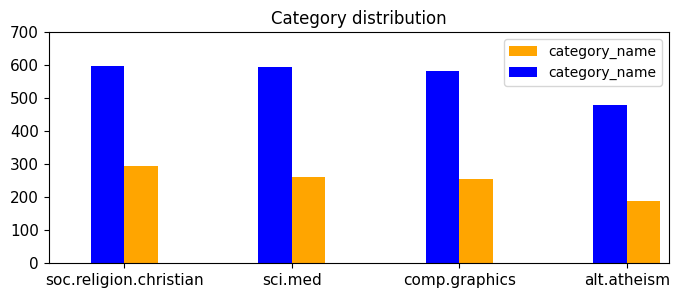

In [14]:
# Answer here
# we can combine the two plots just by calling .plot() again and adjust the position in the parameter
plot = X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3), position=0, color='orange', width=0.2, label = "category_name")
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3), position=1, color='blue', width=0.2,label = "category_name", xlabel="")
plot.legend() #to show the labels for each plots


In [15]:
import nltk

In [16]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [18]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

**Exercise 10 (take home)**

In [19]:
# Answer here
index = np.where(X_counts[0:5, 0:100].toarray()[4] == 1) # get the fifth record and then filter so it only shows the value of 1 in the array
print(count_vect.get_feature_names_out()[index][1]) # get the feature name of the second index that contains the value of 1

01


In [20]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [21]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [22]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

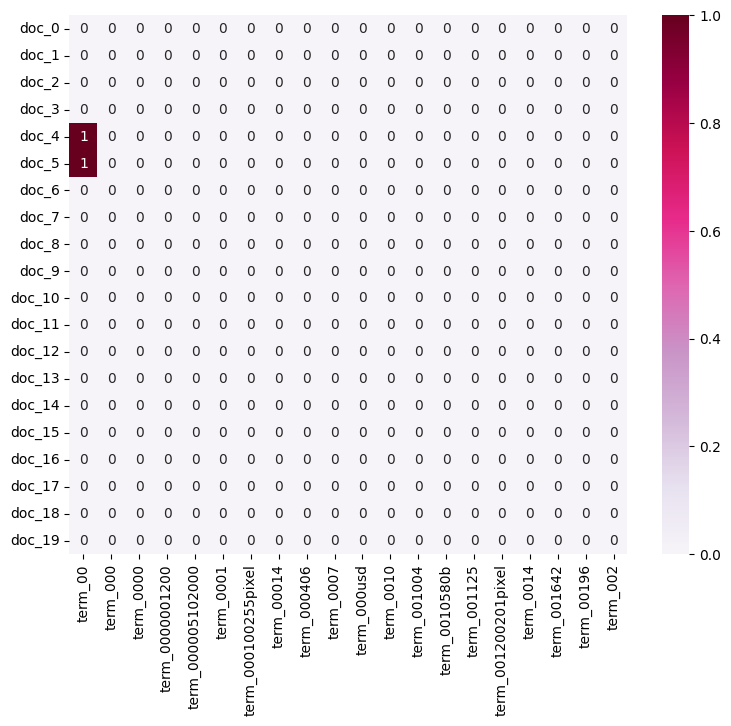

In [23]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**Exercise 11 (take home)**

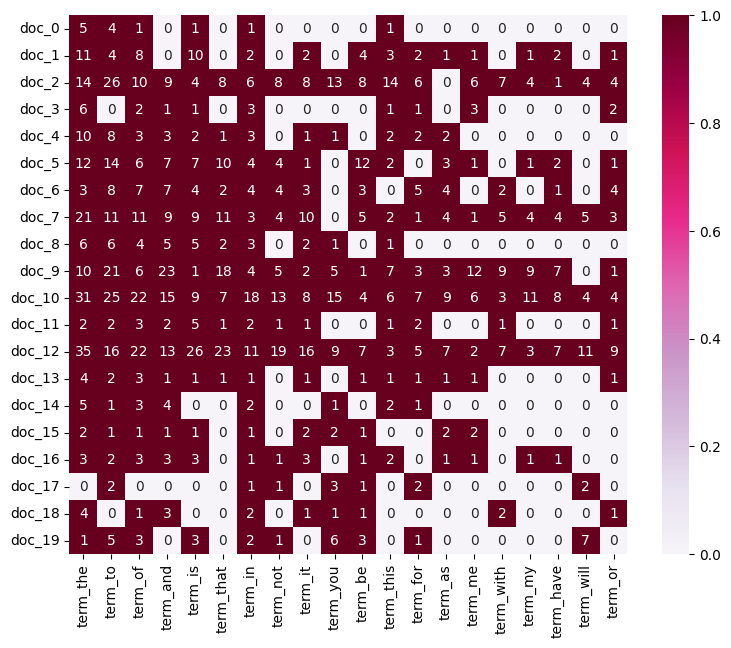

In [24]:
# Answer here
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()] # get the entire features
plot_y = ["doc_"+ str(i) for i in list(X.index)] # get the entire documents
plot_z = X_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

filtered_df_first20 = df_todraw.iloc[:20, :] # get only the first 20 documents
filtered_terms = filtered_df_first20.loc[:, (filtered_df_first20 > 0).any(axis=0)] #filter any feature that doesnt have a value (>0)
top_20_terms = filtered_terms.loc[:, filtered_terms.sum(axis=0).sort_values(ascending=False).index[:20]] #sort the terms from biggest to smallest and then only get the top 20 biggest features
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(top_20_terms,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [25]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [26]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

**Exercise 12 (take home)**

In [27]:
# Answer here
import plotly.express as px

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300], #get only the first 300 terms
    'Frequency': term_frequencies[:300] #get only the first 300 frequencies
})

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()


Exercise 13 (take home)

In [28]:
# Answer here
# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies # all the frequency
})

top_n = 100  # i want to know only the top 100 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from smallest to biggest

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()


**Exercise 14 (take home)**

In [29]:
# Answer here

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies # all the frequency
})

top_n = 50  # i want to know only the top 50 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from biggest to smallest

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()



In [30]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

**Exercise 15(take home)**

In [31]:
# Answer here

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies_log # all the frequency
})

top_n = 50  # i want to know only the top 50 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from biggest to smallest

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()

#Differences:
# The log data has way less frequency difference than the original data
# The log data can eliminate unnecessary outliers that can dominate the dataset like the word 'the'
# We can see the log data easier because the difference between each frequencies is less than 10

#Insights:
# some word frequencies are very common while some are very rare, so a log transform can make us see this distribution by highlighting the long tail
# We can use the data of the uncommon words better because its influence is bigger in the term_frequencies_log 

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])


In [33]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for category in categories:
    filtered_term_document_dfs[category] = filter_top_bottom_words_by_sum(term_document_dfs[category])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filtered_term_document_dfs[categories[category_number]]


Filtered Term-Document Frequency DataFrame for Category comp.graphics:


000  000005102000  000100255pixel  0007  000usd  0010580b  \
0      0             0               0     0       0         0   
1      0             0               0     0       0         0   
2      0             0               0     0       0         0   
3      0             0               0     0       0         0   
4      0             0               0     0       0         0   
..   ...           ...             ...   ...     ...       ...   
579    0             0               0     0       0         0   
580    0             0               0     0       0         0   
581    0             0               0     0       0         0   
582    0             0               0     0       0         0   
583    0             0               0     0       0         0   

     001200201pixel  00196  002  0028  ...  zorn  zrz  zsoft  zt  zug  zurich  \
0                 0      0    0     0  ...     0    0      0   0    0       0   
1                 0      0    0     0  ...     0    0      0   0    0       0   
2                 0      0    0     0  ...     0    0      0   0    0       0   
3                 0      0    0     0  ...     0    0      0   0    0       0   
4                 0      0    0     0  ...     0    0      0   0    0       0   
..              ...    ...  ...   ...  ...   ...  ...    ...  ..  ...     ...   
579               0      0    0     0  ...     0    0      0   0    0       0   
580               0      0    0     0  ...     0    0      0   0    0       0   
581               0      0    0     0  ...     0    0      0   0    0       0   
582               0      0    0     0  ...     0    0      0   0    0       0   
583               0      0    0     0  ...     0    0      0   0    0       0   

     zvi  zyeh  zyxel  ªl  
0      0     0      0   0  
1      0     0      0   0  
2      0     0      0   0  
3      0     0      0   0  
4      0     0      0   0  
..   ...   ...    ...  ..  
579    0     0      0   0  
580    0     0      0   0  
581    0     0      0   0  
582    0     0      0   0  
583    0     0      0   0  

[584 rows x 12932 columns]

**Exercise 16 (take home)**

In [34]:
# Answer here
# Differences:
# The words that are being filtered are different for each category
# The number of words that is filtered is different


# Similiarities:
# The terms starts from 0 and ends on z
# Most of the documents contain different terms, so there are still many terms that one document doesn't contain


In [35]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[category])
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 584
Number of items : 12932
Minimum Transaction Size : 4
Average Transaction Size : 56.41267123287671
Maximum Transaction Size : 2063
Standard Deviation Transaction Size : 152.5206450557005
Variance in Transaction Sizes : 23302.44862132569
Sparsity : 0.995637745806304


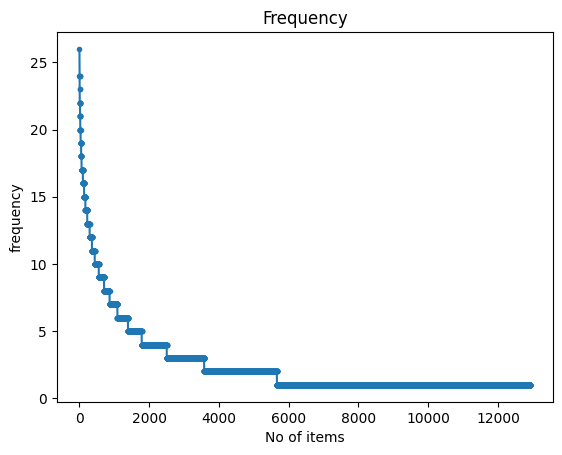

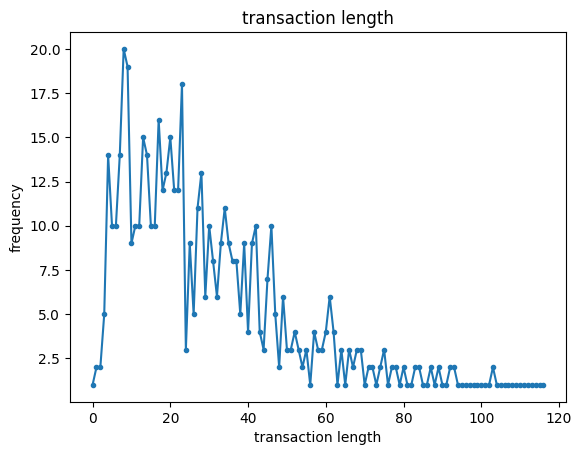

In [37]:
from PAMI.extras.dbStats import TransactionalDatabase as tds #if error, repaste the csv file
obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [38]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 10000
Runtime: 0.3439335823059082


In [39]:
obj1.save('freq_patterns_sci_med_minSup9.txt') #save the patterns
frequentPatternsDF_sci_med

Patterns  Support
0          leave        9
1          swell        9
2          color        9
3       confused        9
4       learning        9
...          ...      ...
9995       means       27
9996       haven       27
9997      happen       27
9998  originator       27
9999        came       29

[10000 rows x 2 columns]

In [40]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 4676
Runtime: 0.17293238639831543


In [41]:
obj2.save('freq_patterns_alt_atheism_minSup9.txt') #save the patterns
frequentPatternsDF_alt_atheism

Patterns  Support
0            choices        9
1               corp        9
2           hausmann        9
3     hausmann maddi        9
4               kids        9
...              ...      ...
4671            date       31
4672        date gmt       19
4673            stay       32
4674         snm6394       32
4675             gmt       34

[4676 rows x 2 columns]

In [42]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33574
Runtime: 0.09392547607421875


In [43]:
obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
frequentPatternsDF_comp_graphics

Patterns  Support
0      individual        9
1         certain        9
2            hall        9
3            mike        9
4              vr        9
...           ...      ...
33569        life       24
33570       ideas       24
33571        feel       24
33572       tried       24
33573       maybe       26

[33574 rows x 2 columns]

In [44]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 11213
Runtime: 0.17256426811218262


In [45]:
obj4.save('freq_patterns_soc_religion_minSup9.txt') #save the patterns
frequentPatternsDF_soc_religion_christian

Patterns  Support
0         latest        9
1            san        9
2          seven        9
3        schools        9
4          chose        9
...          ...      ...
11208         34       33
11209  institute       33
11210       ways       33
11211         oh       34
11212       send       34

[11213 rows x 2 columns]

In [46]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                        Patterns  Support
19911                        gov       33
19912                  institute       33
57158                    snm6394       32
19910                       form       31
57156                    deleted       30
...                          ...      ...
54045  axes funds motss matching        9
54044   boy funds motss matching        9
54043    boy axes motss matching        9
54042    et funds motss matching        9
0                          swell        9

[57159 rows x 2 columns]
Number of patterns discarded: 2304


In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize patterna into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  0000  0000001200  000005102000  0001  000100255pixel  00014  \
0      0    0     0           0             0     0               0      0   
1      0    0     0           0             0     0               0      0   
2      0    0     0           0             0     0               0      0   
3      0    0     0           0             0     0               0      0   
4      1    0     0           0             0     0               0      0   
...   ..  ...   ...         ...           ...   ...             ...    ...   
2252   0    0     0           0             0     0               0      1   
2253   0    0     0           0             0     0               0      0   
2254   0    0     0           0             0     0               0      0   
2255   0    0     0           0             0     0               0      0   
2256   0    0     0           0             0     0               0      0   

      000406  0007  ...  soc princeton funds motss matching  \
0          0     0  ...                                   0   
1          0     0  ...                                   0   
2          0     0  ...                                   0   
3          0     0  ...                                   0   
4          0     0  ...                                   0   
...      ...   ...  ...                                 ...   
2252       0     0  ...                                   0   
2253       0     0  ...                                   0   
2254       0     0  ...                                   0   
2255       0     0  ...                                   0   
2256       0     0  ...                                   0   

      soc princeton boy motss matching  et axes motss matching  \
0                                    0                       0   
1                                    0                       0   
2                                    0                       0   
3                                    0                       0   
4                                    0                       0   
...                                ...                     ...   
2252                                 0                       0   
2253                                 0                       0   
2254                                 0                       0   
2255                                 0                       0   
2256                                 0                       0   

      soc princeton et motss matching  soc princeton al motss matching  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
2252                                0                                0   
2253                                0                                0   
2254                                0                                0   
2255                                0                                0   
2256                                0                                0   

      axes funds motss matching  boy funds motss matching  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
2252                          0                         0   
2253                          0                         0   
2254                          0                         0   
2255                

**Exercise 17 (take home)**

In [48]:
# Answer Here
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
from PAMI.frequentPattern.topk import FAE  as Falg

inputFile = 'td_freq_db_comp_graphics.csv'
seperator='\t'
minimumSupportCountList = [500, 1000, 1500]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FAE algorithm
algorithm = 'FAE'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = Falg.FAE('td_freq_db_comp_graphics.csv', k=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
print(result)

#Specify the input parameters
inputFile = 'td_freq_db_comp_graphics.csv'
seperator='\t'
minimumSupportCountList = [3, 6, 9]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
print(result)


#DATAS:
#TOP-K:
#500: Total No of patterns: 500, Runtime: 0.650309, memory: 1595363328
#1000:Total No of patterns: 1000, Runtime: 1.518010, Memory: 1596911616
#1500:Total No of patterns: 1500, Runtime: 4.436116, Memory: 2011668480

#MaxFPGrowth
#minSup:
#3: Total No of patterns: 6872, Runtime: 13.963832, Memory: 2013286400
#6:Total No of patterns: 1340, Runtime: 0.237728, Memory: 2013327360
#9:Total No of patterns: 660, Runtime: 0.101529, Memory: 2013335552

#Findings:
#Differences:
# The numbers of pattern from FPGrowth is bigger than MaxFPGrowth
# FPGrowth takes more time than MaxFPGrowth
# For Top-K, the more K value means more feature and more running time, while for both FPGrowth and MaxFPGrowth, more minSup means less pattern and less running time


#Similarities
# The memory usage for the three algorithm is similar





 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
  algorithm  minSup  patterns   runtime      memory
0       FAE     500       500  0.645136  4594757632
1       FAE    1000      1000  1.934250  4594999296
2       FAE    1500      1500  3.941267  4595867648
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns    runtime      memory
0  MaxFPGrowth       3      6872  12.746095  4602281984
1  MaxFPGrowth       6      1340   0.258555  4602281984
2  MaxFPGrowth       9       660   0.094012  4602310656


In [49]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

**Exercise 18 (take home)**

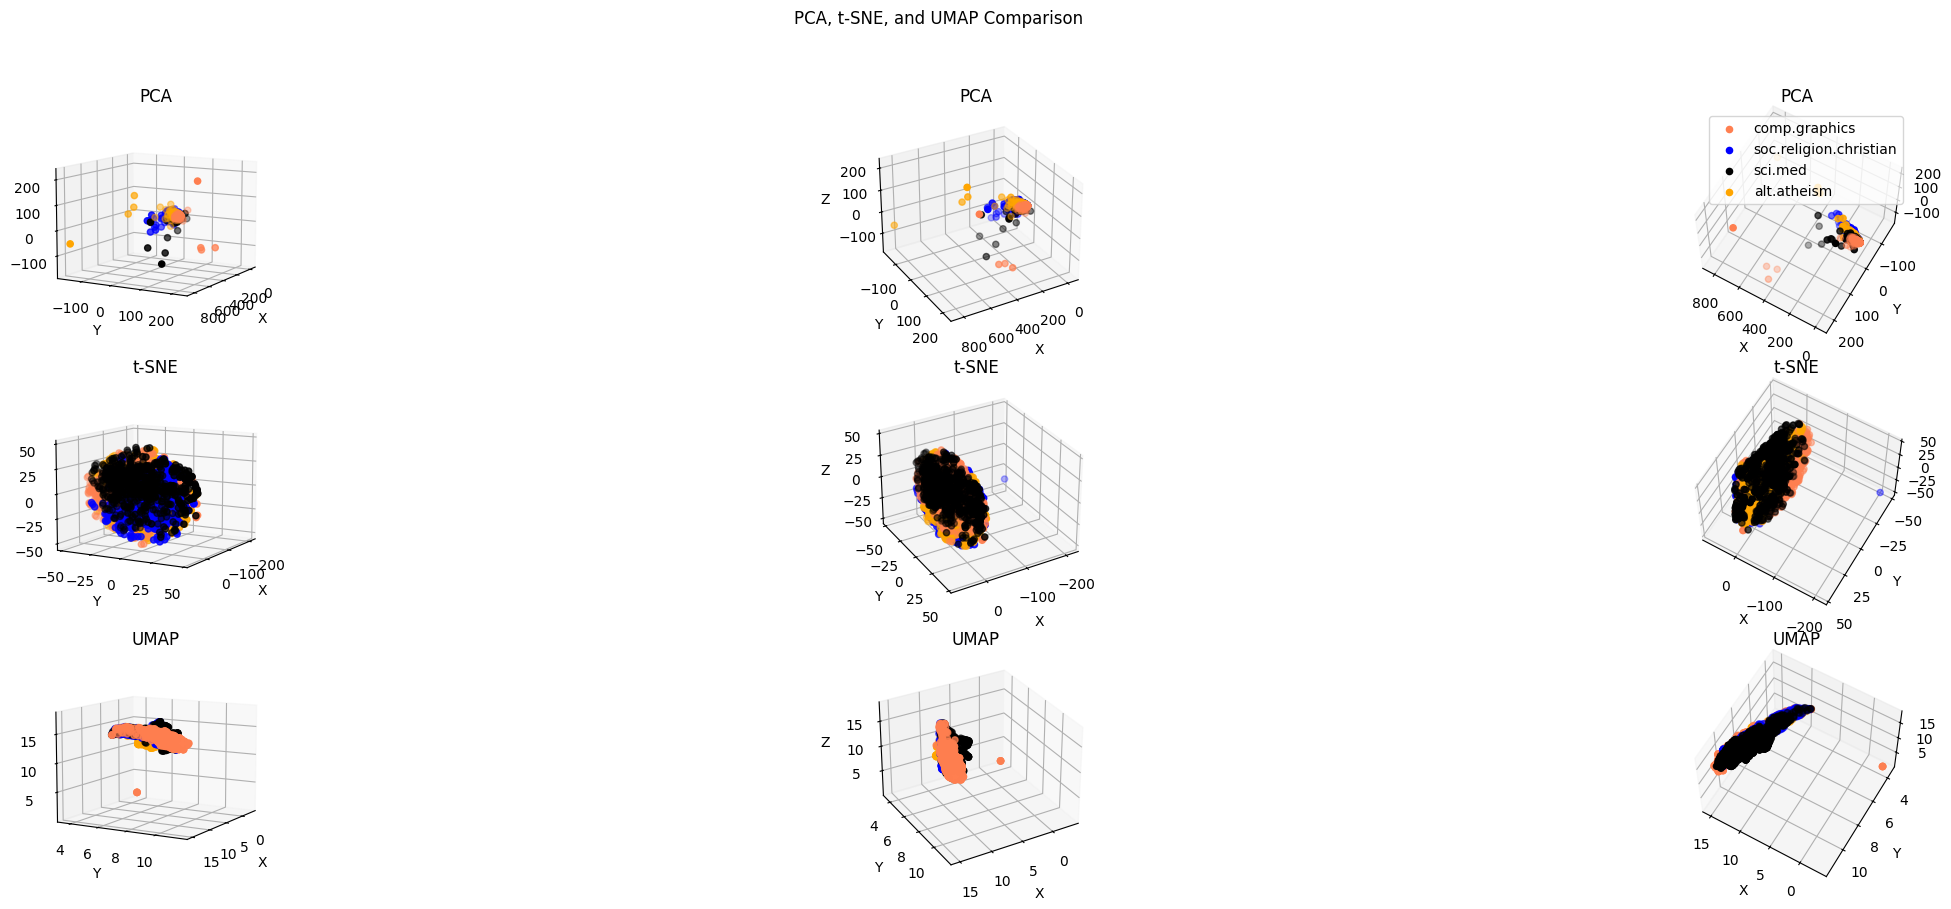

In [50]:
# Answer here

# Change the n_components to 3 for 3D plotting
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(3, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, elev, angle):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2] # add zs for the z axis
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
        ax.view_init(elev = elev, azim=angle) #change camera position
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0, 0], X_pca_aug, 'PCA', 10, 30)
plot_scatter(axes[0, 1], X_pca_aug, 'PCA', 30, 60)
plot_scatter(axes[0, 2], X_pca_aug, 'PCA', 60, 120)
plot_scatter(axes[1, 0], X_tsne_aug, 't-SNE', 10, 30)
plot_scatter(axes[1, 1], X_tsne_aug, 't-SNE', 30, 60)
plot_scatter(axes[1, 2], X_tsne_aug, 't-SNE', 60, 120)
plot_scatter(axes[2, 0], X_umap_aug, 'UMAP', 10, 30)
plot_scatter(axes[2, 1], X_umap_aug, 'UMAP', 30, 60)
plot_scatter(axes[2, 2], X_umap_aug, 'UMAP', 60, 120)
axes[0, 2].legend(loc='upper right') #show the legend only on the top right data

plt.show()

#What i found
# The result of PCA is very sparse and there aren't many data to work with, but we can clearly see which data has the most variation
# The result of t-SNE is very sparse and there are so many datas to work with, it is hard to see how the data looks like because the result still looks very mixed and hard to differentiate
# The result of UMAP is very compact, but  we can clearly see the separation of the data

In [51]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

**Exercise 19 (take home)**

In [52]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#this works because the category_name and category has the same unique values of 4, so the binarization works the same

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

                                      tokenized_text bin_category_name  
0  {Subject:, Michael, City, Thanks, --, anyone, ...      [0, 1, 0, 0]  
1  {done,, Subject:, body, domain, it, segments.,...      [0, 1, 0, 0]  
2  {after, (this, up, U.C., single, preserving, >...      [0, 0, 0, 1]  
3  {poland, after, about, Subject:, on, the, educ...      [0, 0, 0, 1]  
4  {Re:, Subject:, it, feast.'..., wedding, atten...      [0, 0, 0, 1]  
5  {after, Re:, Subject:, it, Univ., roboticist-i...      [0, 0, 0, 1]  
6  {Re:, Subject:, Moore, ourselves, it, self-con...      [0, 0, 0, 1]  
7  {submerging, wierd, washing, >enough,, meat).,...      [0, 0, 1, 0]  
8  {Blindsight, Re:, Subject:, Explain., green,, ...      [0, 0, 1, 0]

## 2. New Dataset

In [53]:
#import and create a new dataframe using the new dataset
import helpers.data_mining_helpers_new as dmh
df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv") #load the new dataset into df
X = pd.DataFrame.from_records(dmh.format_rows(df), columns= ['comment'])

In [54]:
# add category to the dataframe
X['sentiment_name'] = df.sentiment

In [55]:
# add category binary also
X['sentiment'] = X.sentiment_name.apply(lambda t: 1 if t == 'nostalgia' else 0)

In [56]:
X[0:10]

comment sentiment_name  sentiment
0  He was a singer with a golden voice that I lov...  not nostalgia          0
1  The mist beautiful voice ever I listened to hi...      nostalgia          1
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia          1
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia          0
4  listening to his songs reminds me of my mum wh...      nostalgia          1
5  Every time I heard this song as a child, I use...      nostalgia          1
6  My dad loved listening to Jim Reeves, when I w...      nostalgia          1
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia          1
8           Wherever you  are you always in my heart  not nostalgia          0
9  Elvis will always be number one no one can com...  not nostalgia          0

In [57]:

print(X.query('sentiment == 0')) # query about the datas where the the sentiment is not nostalgia

print(X[X['sentiment_name'].isin(['nostalgia'])]) # filter sentiment_name so it only shows for nostalgia sentiment datas

print(X[X['sentiment'].between(0,1)]) # filter the data so the sentiment is only between 0 to 1


                                                comment sentiment_name  \
0     He was a singer with a golden voice that I lov...  not nostalgia   
3     30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
8              Wherever you  are you always in my heart  not nostalgia   
9     Elvis will always be number one no one can com...  not nostalgia   
10    ill bet if they begin to play this song on the...  not nostalgia   
...                                                 ...            ...   
1493  He really has that "love you like a brother" l...  not nostalgia   
1494  That's funny. But Leo really is a nice guy. He...  not nostalgia   
1495  i don't know!..but the opening of the video,.....  not nostalgia   
1496  it's sad this is such a beautiful song when yo...  not nostalgia   
1497  Dear Friend, I think age and time is not that ...  not nostalgia   

      sentiment  
0             0  
3             0  
8             0  
9             0  
10            0  
...

In [58]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                      sentiment_name  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            sentiment  
0  The amoung of missing records is:   
1                                   0

In [59]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [60]:
sum(X.duplicated())

1

In [61]:
sum(X.duplicated('comment'))

1

In [62]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [63]:
len(X)

1498

In [64]:
X_sample = X.sample(n=1000) #random state

In [65]:
len(X_sample)

1000

In [66]:
X_sample[0:4]

comment sentiment_name  \
725  Lovely pictures..... sweet and sad nostalgia.....      nostalgia   
66   classic Classic music that along with the beat...  not nostalgia   
69   Hearing him makes me want to cry.  He was my G...      nostalgia   
427  never get tired of this song... grew up listen...  not nostalgia   

     sentiment  
725          1  
66           0  
69           1  
427          0

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment_name
nostalgia        510
not nostalgia    490
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment_name'>

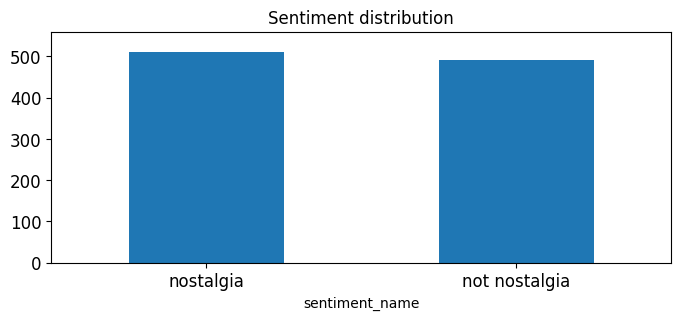

In [68]:

upper_bound = max(X_sample.sentiment_name.value_counts() + 50)

print(X_sample.sentiment_name.value_counts())

# plot barchart for X_sample
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))


In [69]:
import nltk

In [70]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [72]:
count_vect.get_feature_names_out()[148]

'75'

In [73]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [74]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [75]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [76]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [77]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [78]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

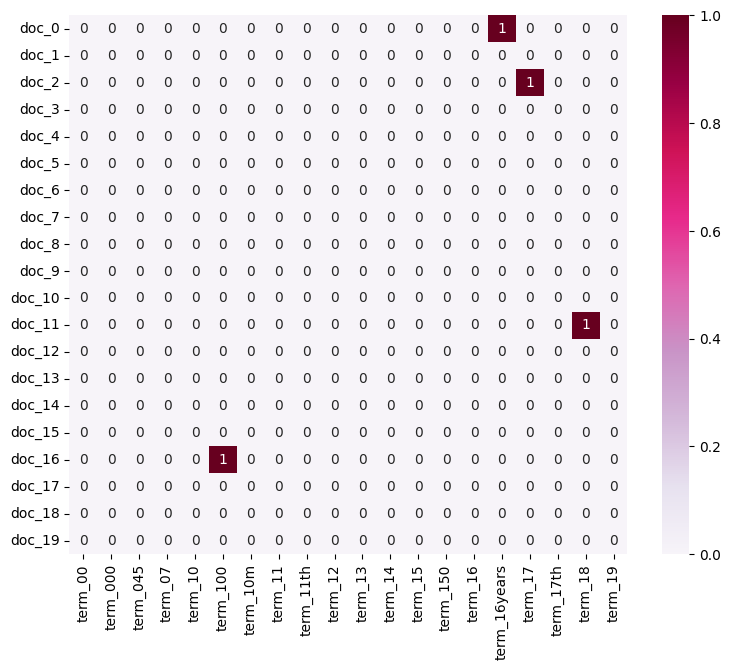

In [79]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

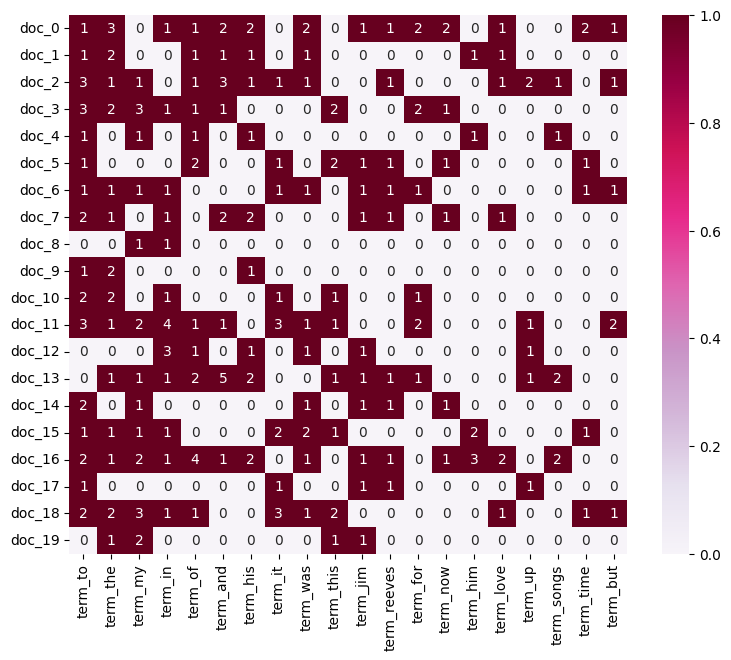

In [80]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()] # get the entire features
plot_y = ["doc_"+ str(i) for i in list(X.index)] # get the entire documents
plot_z = X_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

filtered_df_first20 = df_todraw.iloc[:20, :] # get only the first 20 documents
filtered_terms = filtered_df_first20.loc[:, (filtered_df_first20 > 0).any(axis=0)] #filter any feature that doesnt have a value (>0)
top_20_terms = filtered_terms.loc[:, filtered_terms.sum(axis=0).sort_values(ascending=False).index[:20]] #sort the terms from biggest to smallest and then only get the top 20 biggest features
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(top_20_terms,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [81]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


In [82]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [83]:
term_frequencies[0] #sum of first term: 00

1

In [84]:
# Answer here
import plotly.express as px

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()


In [85]:
# Answer here
# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies # all the frequency
})

top_n = 100  # i want to know only the top 100 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from smallest to biggest
# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()


In [86]:
# Answer here

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies # all the frequency
})

top_n = 50  # i want to know only the top 50 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from biggest to smallest

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()



In [87]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\Humam\AppData\Local\Temp\ipykernel_6632\1860482915.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

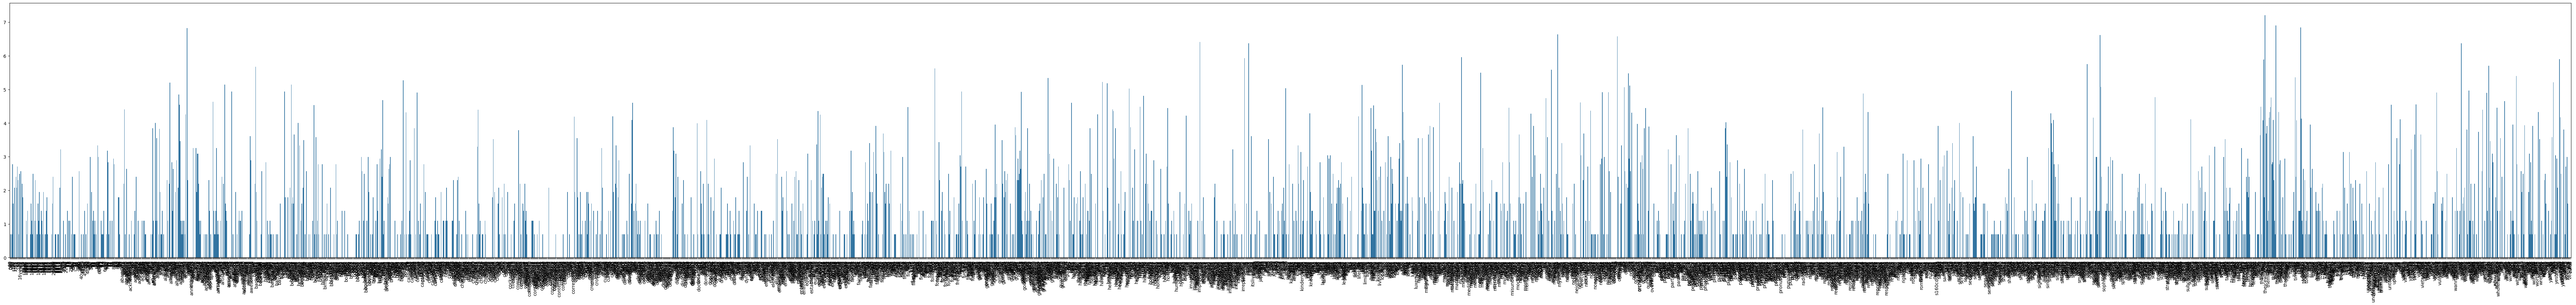

In [88]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out(),
                y=term_frequencies_log)
g.set_xticklabels(count_vect.get_feature_names_out(), rotation = 90)

In [89]:
# Answer here

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies_log # all the frequency
})

top_n = 50  # i want to know only the top 50 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from biggest to smallest

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()

#Differences:
# The log data has way less frequency difference than the original data
# The log data can eliminate unnecessary outliers that can dominate the dataset like the word '01'
# We can see the log data easier because the difference between each frequencies is less than 10

#Insights:
# some word frequencies are very common while some are very rare, so a log transform can make us see this distribution by highlighting the long tail
# We can use the data of the uncommon words better because its influence is bigger in the term_frequencies_log 

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment_name'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment_name'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])


In [91]:
# Display the filtered DataFrame for one of the sentiments, feel free to change the number in the vector
sentiment_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
743     0         0      0        0    0    0        0      0  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     1         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  

[748 rows x 2602 columns]

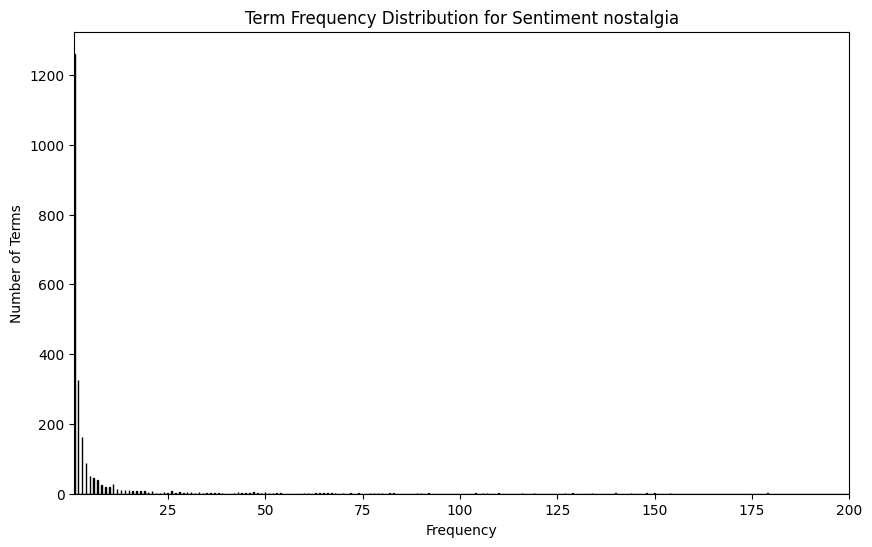

In [92]:
 # Sum over all documents to get total frequency for each word
sentiment_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [93]:
sentiment_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: nostalgia
Number of terms in top 5%: 114
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum', 'human', 'degrade', 'humming', 'defining', 'hums', 'hurry', 'dedicated', 'declined', 'decide', 'decent', 'decency', 'december', 'husbands', 'decca', 'ibm', 'death', 'danube', 'democrat', 'imprinted', 'danial', 'crying', 'cry', 'insane', 'cruise', 'cruel', 'crown', 'crossroads', 'crystal', 'crossed', 'inspire', 'crescendo', 'instantly', 'instead', 'instinctively', 'instructions', 'created', 'crop', 'cuban', 'innocent', 'cupcakes', 'incase', 'incredibly', 'dancers', 'incurable', 'india', 'damn', 'dairy', 'dads', 'daddy', 'industry', 'influential', 'infomercial', 'curtis', 'inhaling', 'curled', 'curious', 'innocence', 'in', 'hug', 'https', 'depending', 'divine', 'disturbing', 'distraction', 'hit', 'hitler', 'di

In [94]:
sentiment_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['nicer', 'dc', 'if', 'ignore', 'ill', 'david', 'illicit', 'im', 'idea', 'images', 'imho', 'imitated', 'immediately', 'impeccable', 'impersonate', 'dark', 'impossible', 'imagine', 'deal', 'dean', 'iconized', 'hum']


In [95]:
sentiment_number=0 #You can change it from 0 to 1

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]


Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
743    0    0   0    0    0   0   0   0   0    0  ...        0         0   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
743           0         0      0        0    0    0        0      0  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  

[748 rows x 2446 columns]

In [96]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)


Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


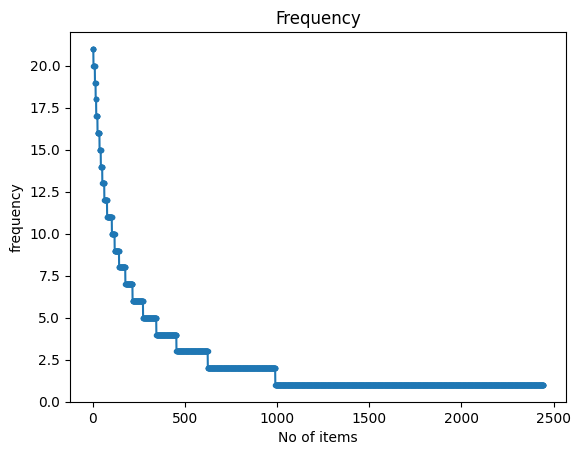

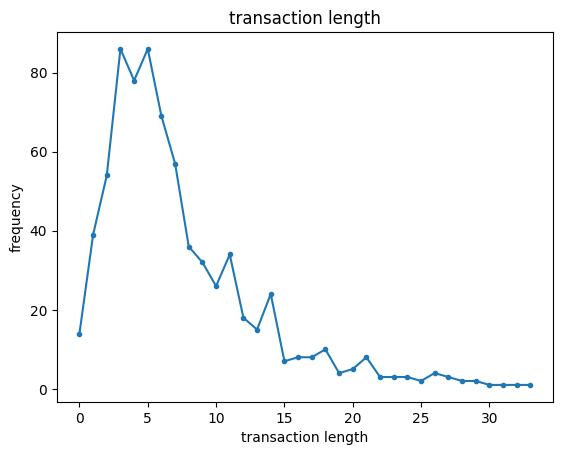

In [97]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


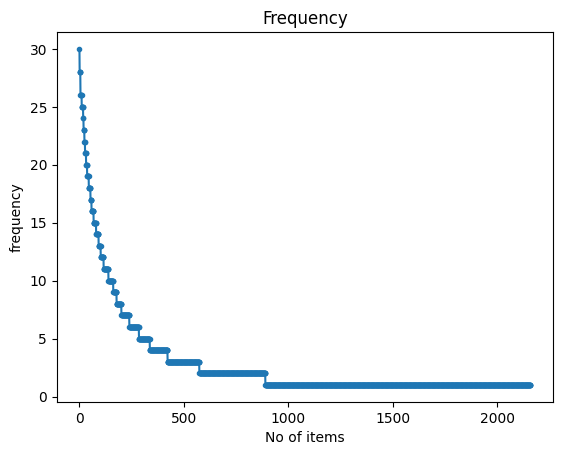

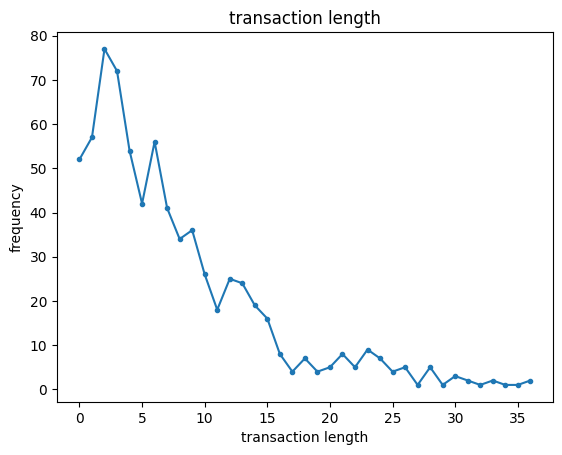

In [98]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [99]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.0074994564056396484


In [100]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [101]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.005506753921508789


In [102]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [103]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one Sentiment
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all sentiments
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each sentiment, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
219       will       28
218      would       28
217       ever       28
216       wish       26
215         or       26
..         ...      ...
1      special        9
96       along        9
95    together        9
94        left        9
0    favorites        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [104]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your comment data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  place  karen  \
0      0    0    0   0   0    0    0   0     0   0  ...      0      0   
1      0    0    0   0   0    0    0   0     0   0  ...      0      0   
2      0    0    0   0   0    0    0   0     0   0  ...      0      0   
3      0    0    0   0   0    0    0   0     0   0  ...      0      0   
4      0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
0           0      0   0        0      0         0     0          0  
1           0      0   0        0      0         0     0          0  
2           0      0   0        0      0         0     0          0  
3           0      0   0        0      0         0     0          0  
4           0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1495        0      0   0        0      0         0     0          0  
1496        0      0   0        0      0         0     0          0  
1497        0      0   0        0      0         0     0          0  
1498        0      0   0        0      0         0     0          0  
1499        0      0   0        0      0         0     0          0  

[1498 rows x 3950 columns]

In [105]:
# Answer Here
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
from PAMI.frequentPattern.topk import FAE  as Falg

inputFile = 'td_freq_db_nostalgia.csv'
seperator='\t'
minimumSupportCountList = [50, 100, 150]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of FAE algorithm
algorithm = 'FAE'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = Falg.FAE('td_freq_db_nostalgia.csv', k=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
print(result)

#Specify the input parameters
inputFile = 'td_freq_db_nostalgia.csv'
seperator='\t'
minimumSupportCountList = [3, 6, 9]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
for minSupCount in minimumSupportCountList:
    obj = alg.MaxFPGrowth(inputFile, minSup=minSupCount, sep=seperator)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['MaxFPGrowth', minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]
print(result)





 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
 TopK frequent patterns were successfully generated using FAE algorithm.
  algorithm  minSup  patterns   runtime      memory
0       FAE      50        50  0.006011  2951139328
1       FAE     100       100  0.007342  2951131136
2       FAE     150       150  0.008506  2951147520
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
     algorithm  minSup  patterns   runtime      memory
0  MaxFPGrowth       3       682  0.017639  2951233536
1  MaxFPGrowth       6       274  0.010681  2951213056
2  MaxFPGrowth       9       176  0.009325  2951213056


In [106]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [107]:
X_pca_tdm.shape

(1498, 2)

In [108]:
X_tsne_tdm.shape

(1498, 2)

In [109]:
X_umap_tdm.shape

(1498, 2)

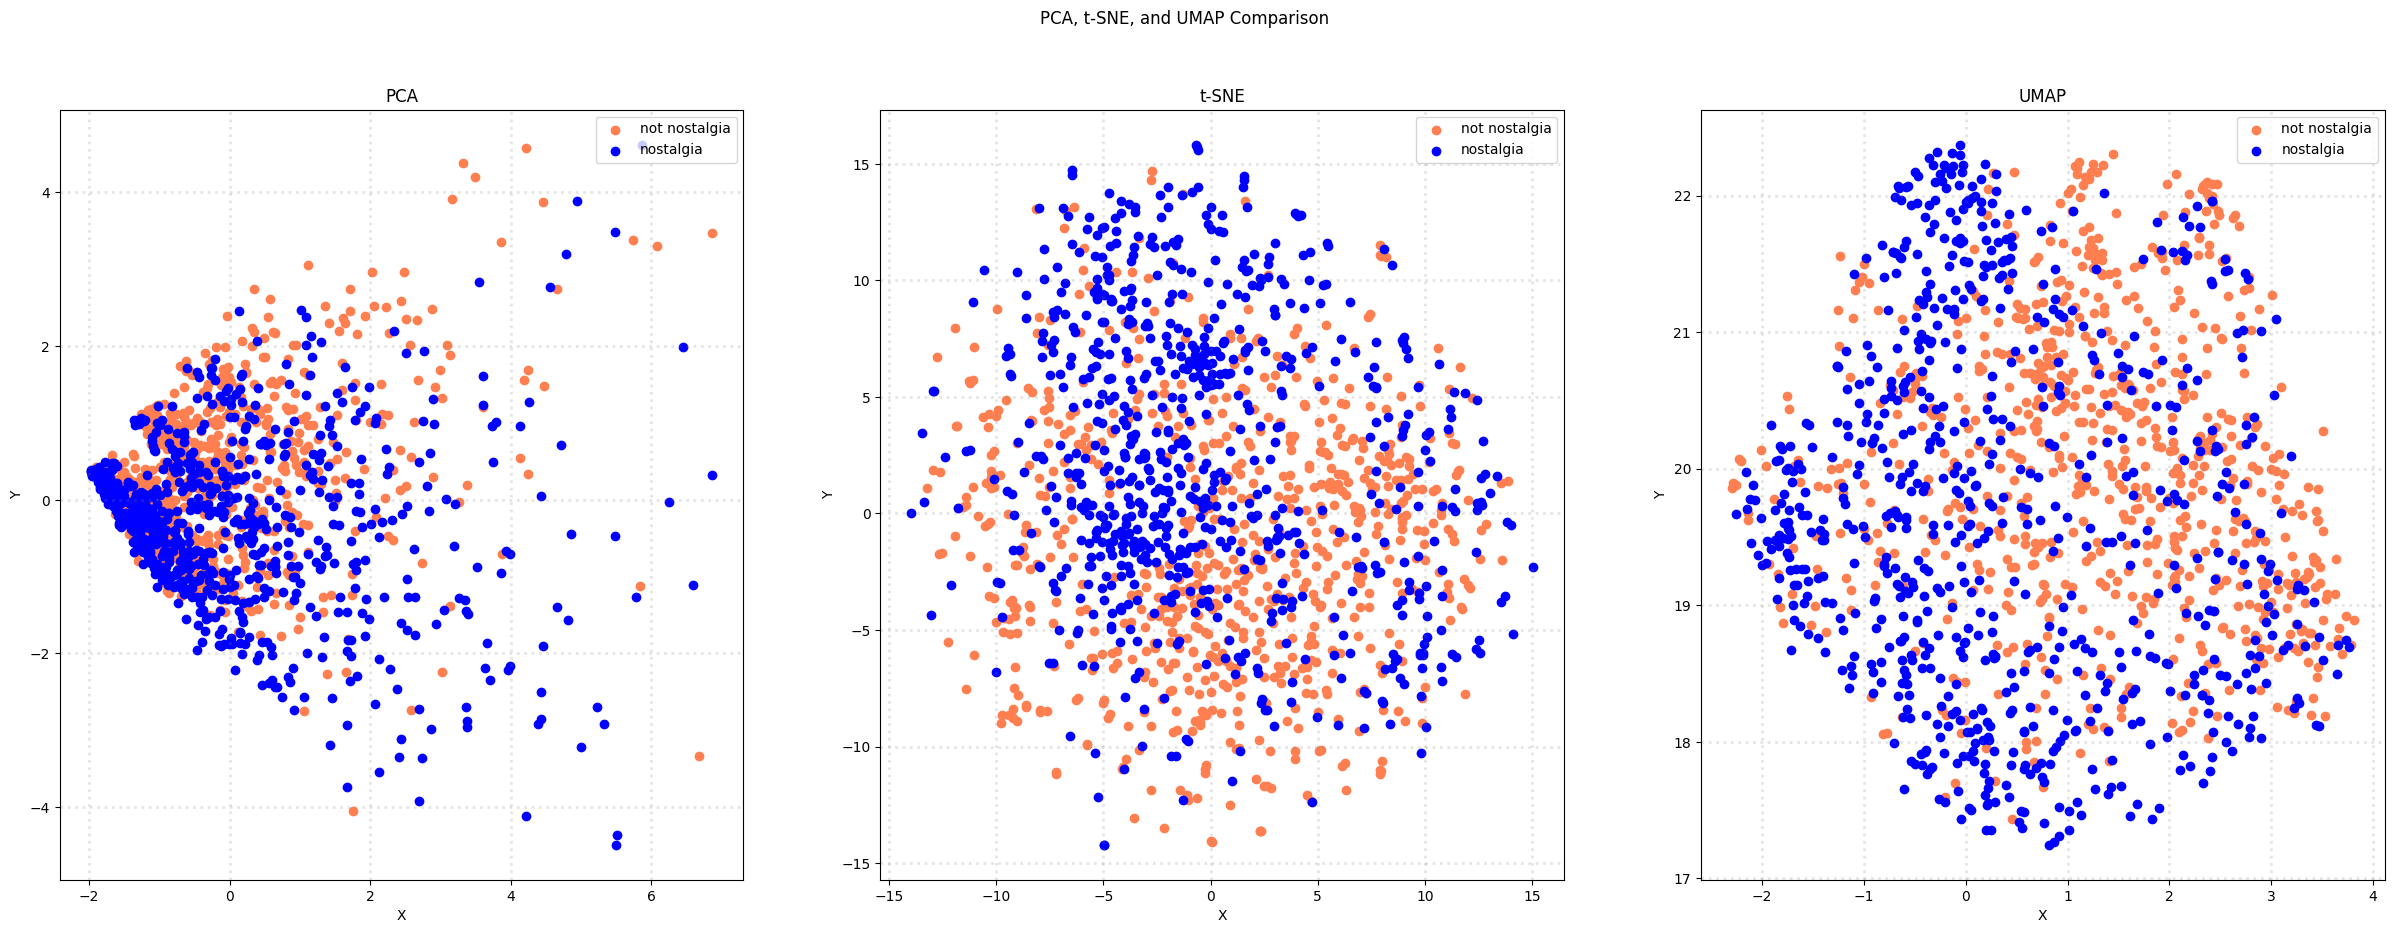

In [110]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [111]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

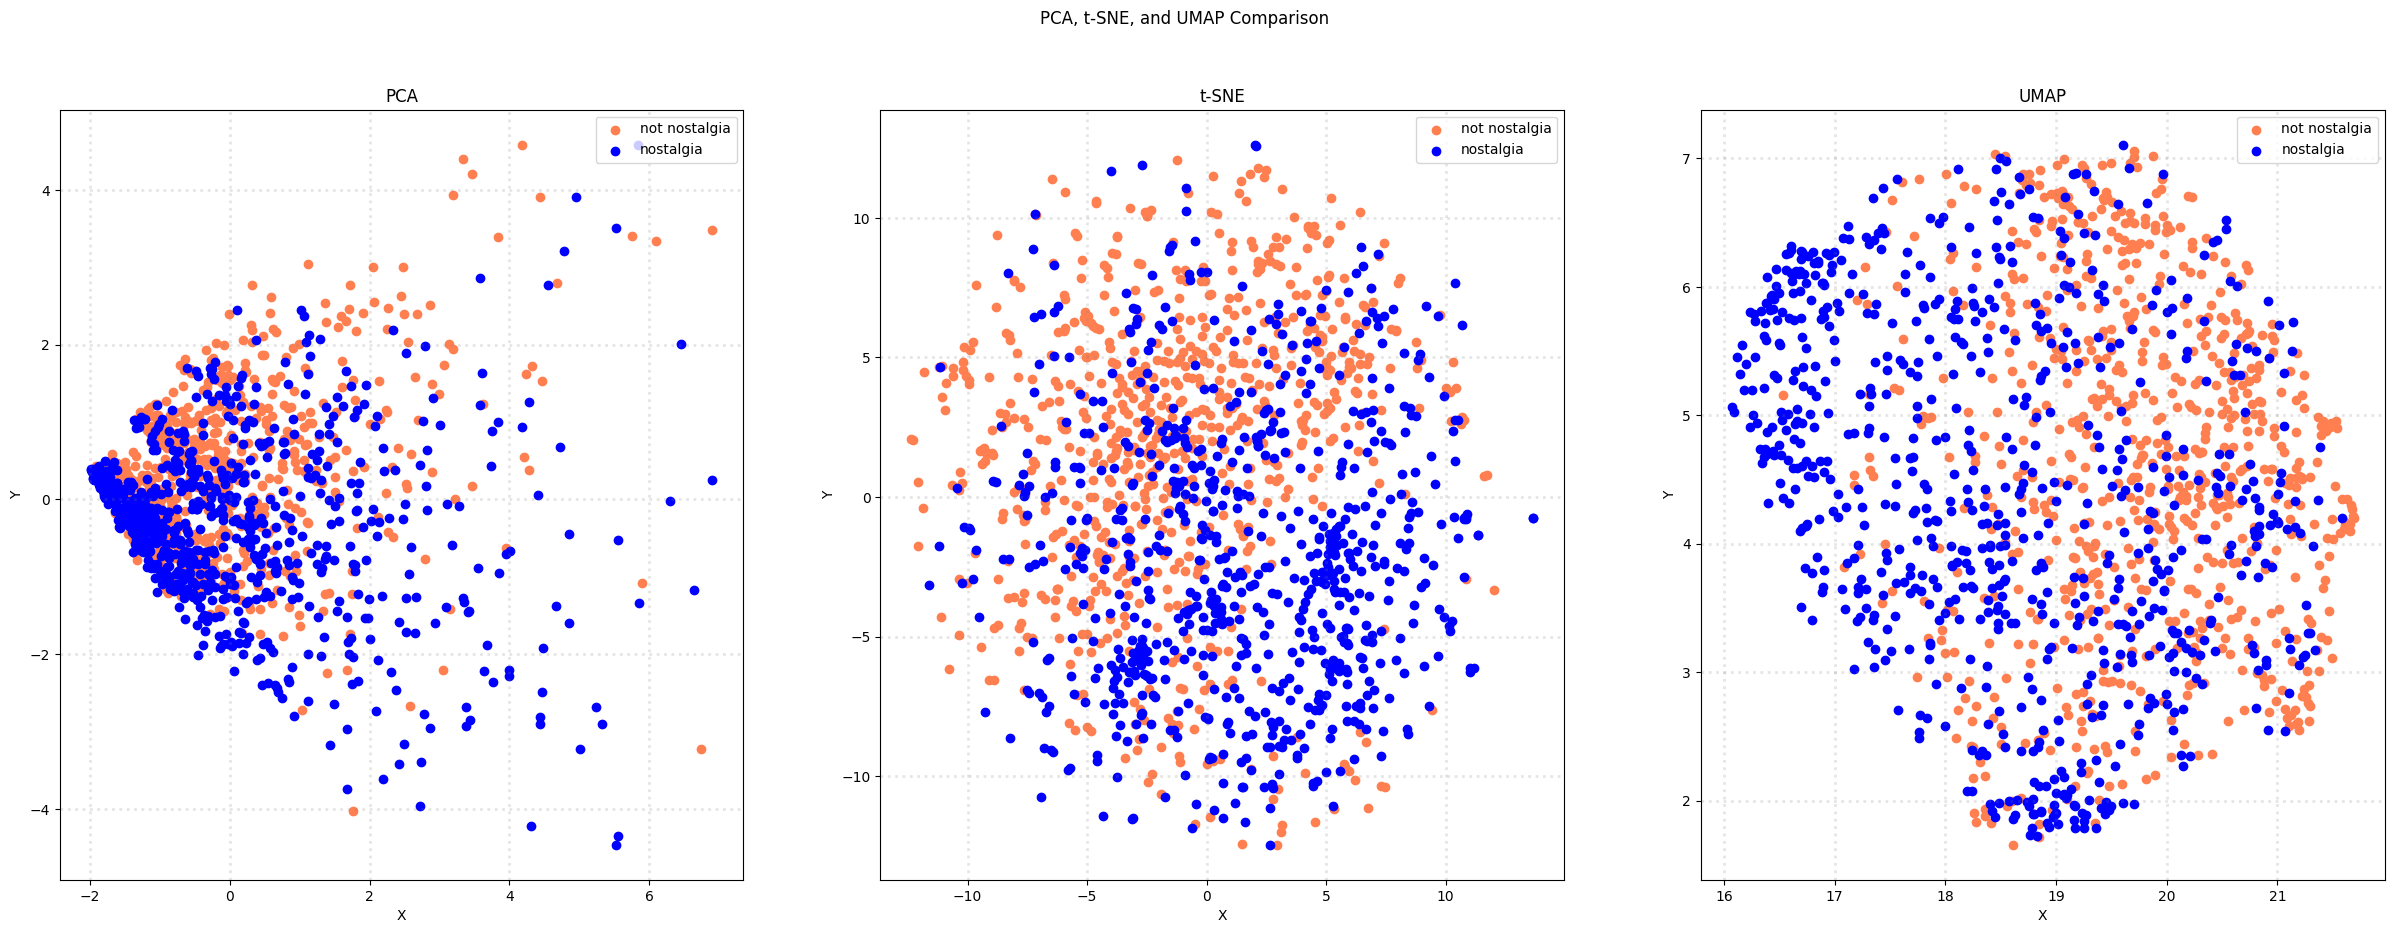

In [112]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

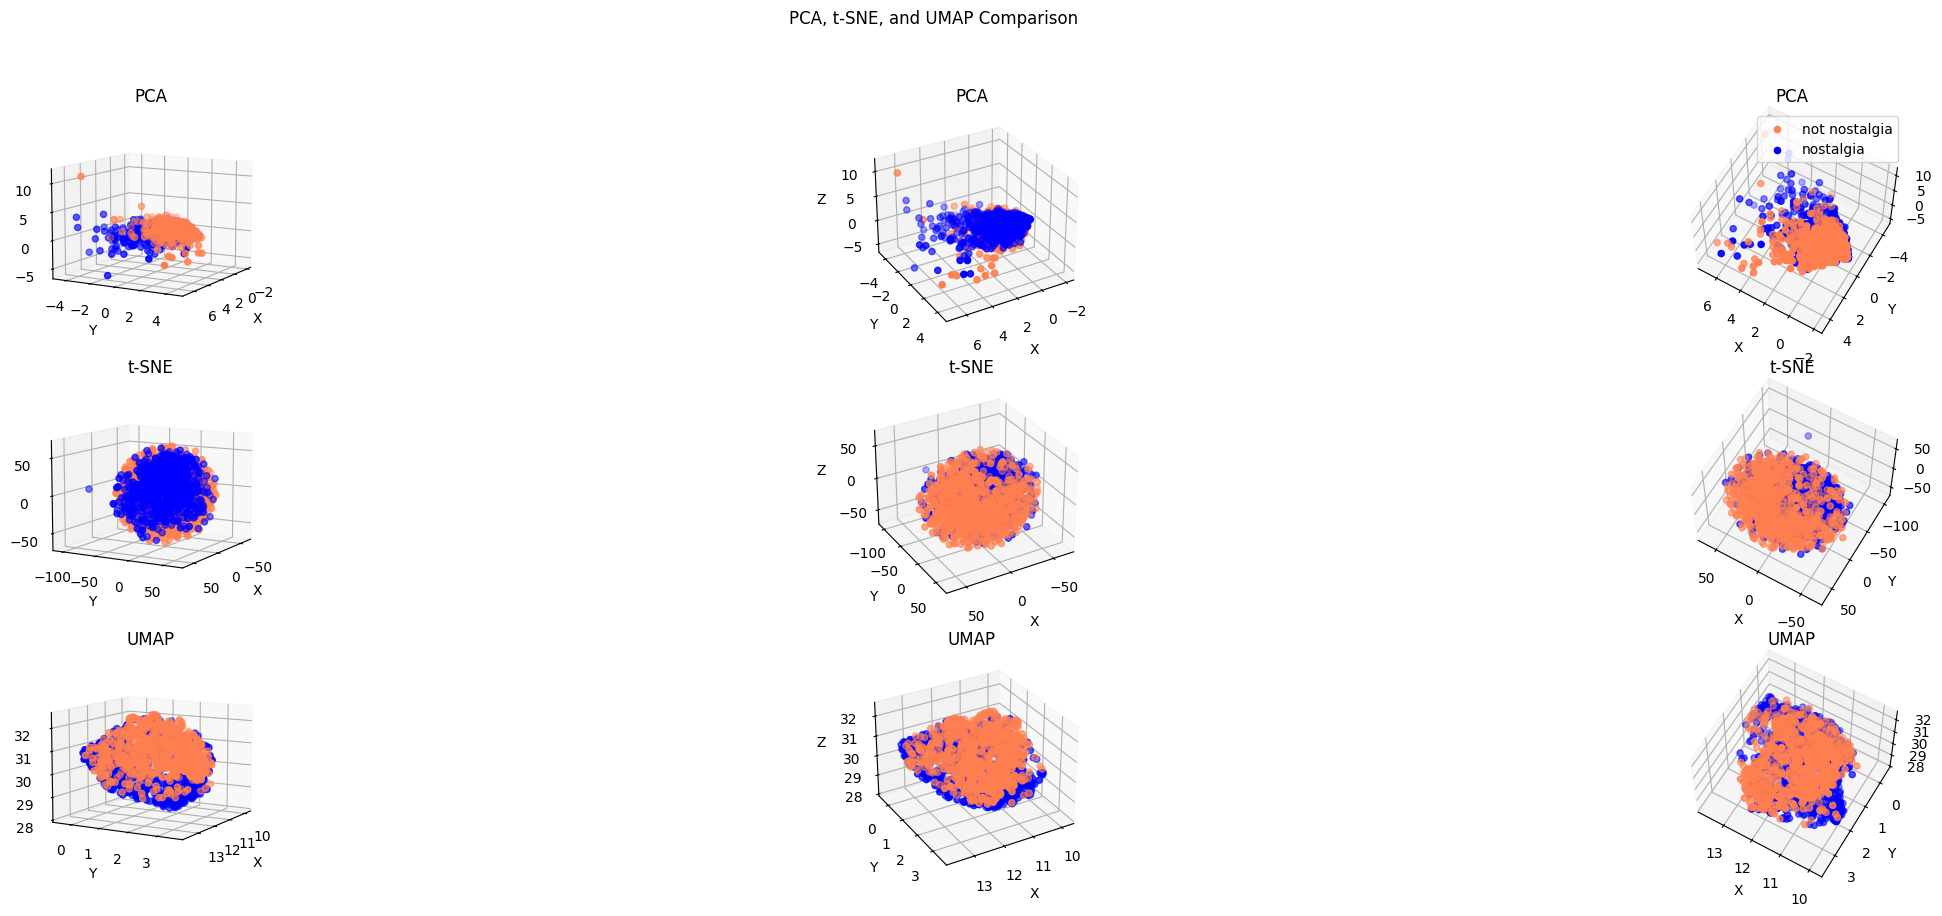

In [113]:
# Answer here

# Change the n_components to 3 for 3D plotting
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(3, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, elev, angle):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        zs = X_reduced[X['sentiment_name'] == sentiment].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment)
        ax.view_init(elev = elev, azim=angle) #change camera position
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0, 0], X_pca_aug, 'PCA', 10, 30)
plot_scatter(axes[0, 1], X_pca_aug, 'PCA', 30, 60)
plot_scatter(axes[0, 2], X_pca_aug, 'PCA', 60, 120)
plot_scatter(axes[1, 0], X_tsne_aug, 't-SNE', 10, 30)
plot_scatter(axes[1, 1], X_tsne_aug, 't-SNE', 30, 60)
plot_scatter(axes[1, 2], X_tsne_aug, 't-SNE', 60, 120)
plot_scatter(axes[2, 0], X_umap_aug, 'UMAP', 10, 30)
plot_scatter(axes[2, 1], X_umap_aug, 'UMAP', 30, 60)
plot_scatter(axes[2, 2], X_umap_aug, 'UMAP', 60, 120)
axes[0, 2].legend(loc='upper right') #show the legend only on the top right data

plt.show()

In [114]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [115]:
mlb = preprocessing.LabelBinarizer()

In [116]:
mlb.fit(X.sentiment)

LabelBinarizer()

In [117]:
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()

In [118]:
X[0:9]

comment sentiment_name  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

   sentiment                                           unigrams  \
0          0  [He, was, a, singer, with, a, golden, voice, t...   
1          1  [The, mist, beautiful, voice, ever, I, listene...   
2          1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4          1  [listening, to, his, songs, reminds, me, of, m...   
5          1  [Every, time, I, heard, this, song, as, a, chi...   
6          1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7          1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8          0   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_sentiment  
0  {have, but,, age, the, I, can, to, 16years, st...           [0]  
1  {an, I, to, mist, voice, forgotten, kid, singi...           [1]  
2  {have, sweet,, job, age, smooth, I, the, to, g...           [1]  
3  {have, served, the, I, can, to, This, Thank, s...           [0]  
4  {played, to, who, reminds, mum, everyday, my, ...           [1]  
5  {Now, time, as, I, song., to, funerals., it, s...           [1]  
6  {teenager, I, the, to, loved, it, in, changes,...           [1]  
7  {the, I, to, 71, in, ALSO, i, me, now, and, .,...           [1]  
8        {you, are, in, my, Wherever, always, heart}           [0]

In [119]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment_name)
X['bin_sentiment_name'] = mlb.transform(X['sentiment_name']).tolist()
X[0:9]
#this works because the sentiment_name and sentiment has the same unique values of 2, so the binarization works the same

comment sentiment_name  \
0  He was a singer with a golden voice that I lov...  not nostalgia   
1  The mist beautiful voice ever I listened to hi...      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia   
4  listening to his songs reminds me of my mum wh...      nostalgia   
5  Every time I heard this song as a child, I use...      nostalgia   
6  My dad loved listening to Jim Reeves, when I w...      nostalgia   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia   
8           Wherever you  are you always in my heart  not nostalgia   

   sentiment                                           unigrams  \
0          0  [He, was, a, singer, with, a, golden, voice, t...   
1          1  [The, mist, beautiful, voice, ever, I, listene...   
2          1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4          1  [listening, to, his, songs, reminds, me, of, m...   
5          1  [Every, time, I, heard, this, song, as, a, chi...   
6          1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7          1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8          0   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_sentiment  \
0  {have, but,, age, the, I, can, to, 16years, st...           [0]   
1  {an, I, to, mist, voice, forgotten, kid, singi...           [1]   
2  {have, sweet,, job, age, smooth, I, the, to, g...           [1]   
3  {have, served, the, I, can, to, This, Thank, s...           [0]   
4  {played, to, who, reminds, mum, everyday, my, ...           [1]   
5  {Now, time, as, I, song., to, funerals., it, s...           [1]   
6  {teenager, I, the, to, loved, it, in, changes,...           [1]   
7  {the, I, to, 71, in, ALSO, i, me, now, and, .,...           [1]   
8        {you, are, in, my, Wherever, always, heart}           [0]   

  bin_sentiment_name  
0                [1]  
1                [0]  
2                [0]  
3                [1]  
4                [0]  
5                [0]  
6                [0]  
7                [0]  
8                [1]

In [120]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [121]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [122]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [123]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Humam\AppData\Local\Temp\ipykernel_6632\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Humam\AppData\Local\Temp\ipykernel_6632\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Humam\AppData\Local\Temp\ipykernel_6632\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Humam\AppData\Local\Temp\ipykernel_6632\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [124]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [125]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [126]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [127]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [128]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [129]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  place  karen  \
890    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0      0   
709    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0      0   
940    0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0      0   
862    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
890         0      0   0        0      0         0     0          0  
1397        0      0   0        0      0         0     0          0  
709         0      0   0        0      0         0     0          0  
1273        0      0   0        0      0         0     0          0  
940         0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1132        0      0   0        0      0         0     0          0  
1296        0      0   0        0      0         0     0          0  
862         0      0   0        0      0         0     0          0  
1461        0      0   0        0      0         0     0          0  
1128        0      0   0        0      0         0     0          0  

[1048 rows x 3950 columns]

In [130]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  place  karen  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0      0   
790    0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0      0   
484    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0      0   
201    0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
1035        0      0   0        0      0         0     0          0  
1307        0      0   0        0      0         0     0          0  
1437        0      0   0        0      0         0     0          0  
1491        0      0   0        0      0         0     0          0  
790         0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1231        0      0   0        0      0         0     0          0  
1275        0      0   0        0      0         0     0          0  
484         0      0   0        0      0         0     0          0  
1329        0      0   0        0      0         0     0          0  
201         0      0   0        0      0         0     0          0  

[450 rows x 3950 columns]

In [131]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9289    0.8305    0.8770       236
    nostalgia     0.8326    0.9299    0.8786       214

     accuracy                         0.8778       450
    macro avg     0.8808    0.8802    0.8778       450
 weighted avg     0.8831    0.8778    0.8777       450



## 3. Attempts on the New Dataset

**New Data Visualizaton**

In [132]:
!pip install wordcloud

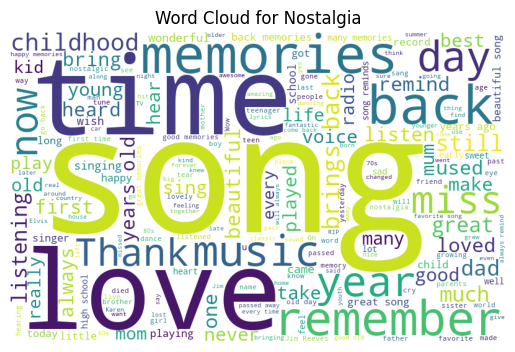

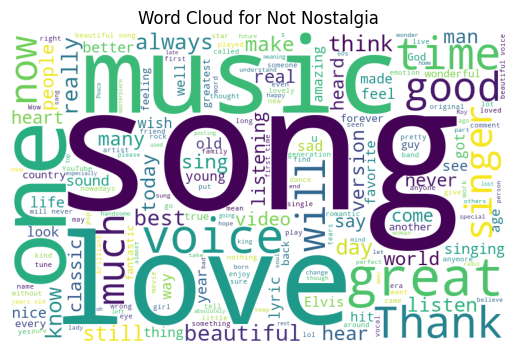

In [133]:
from wordcloud import WordCloud

# Generate word cloud for "nostalgia" and "not nostalgia" sentiments
text = " ".join(X[X['sentiment_name'] == "nostalgia"]['comment'])
wordcloud = WordCloud(width = 800, height = 500, background_color = "white").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Word Cloud for Nostalgia')
plt.show()

text = " ".join(X[X['sentiment_name'] == "not nostalgia"]['comment'])
wordcloud = WordCloud(width = 800, height = 500, background_color = "white").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Word Cloud for Not Nostalgia')
plt.show()


**TF-IDF Features**

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	0.10512242613948135
  (0, 3570)	0.1395362132685669
  (0, 2973)	0.13337598417101282
  (0, 3650)	0.09116875732490397
  (0, 1470)	0.17742899300775078
  (0, 3534)	0.10583883750913557
  (0, 3282)	0.08098852685035728
  (0, 2028)	0.08425574837468117
  (0, 3336)	0.056549174016642896
  (0, 1606)	0.1189173359366918
  (0, 233)	0.1978969806456795
  (0, 3284)	0.15159319854457548
  (0, 3328)	0.18796232534895616
  (0, 1651)	0.22760529302349403
  (0, 1512)	0.09514910066637612
  (0, 1249)	0.1985326064308052
  (0, 323)	0.10632598515668054
  (0, 214)	0.14662971231064667
  (0, 2341)	0.061587482183078086
  (0, 15)	0.2319810423360621
  (0, 1733)	0.06687972443553816
  (0, 3304)	0.12461719323016085
  (0, 907)	0.1131812764053898
  (0, 258)	0.11455169045496554
  (0, 3124)	0.11081534257382304
  (0, 2328)	0.21167767501827114
  (0, 245)	0.18618778394860272
  (0, 3581)	0.10783601751651177
  (0, 1591)	0.09689935714518438
  (0, 2082)	0.11380264651174701
  (0, 2974)	0.15632537958469636
  (0, 573)	0.0949794

In [135]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [136]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [137]:
X_counts.shape

(1498, 3730)

In [138]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [139]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [140]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [141]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.23198104, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.1402027 , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0

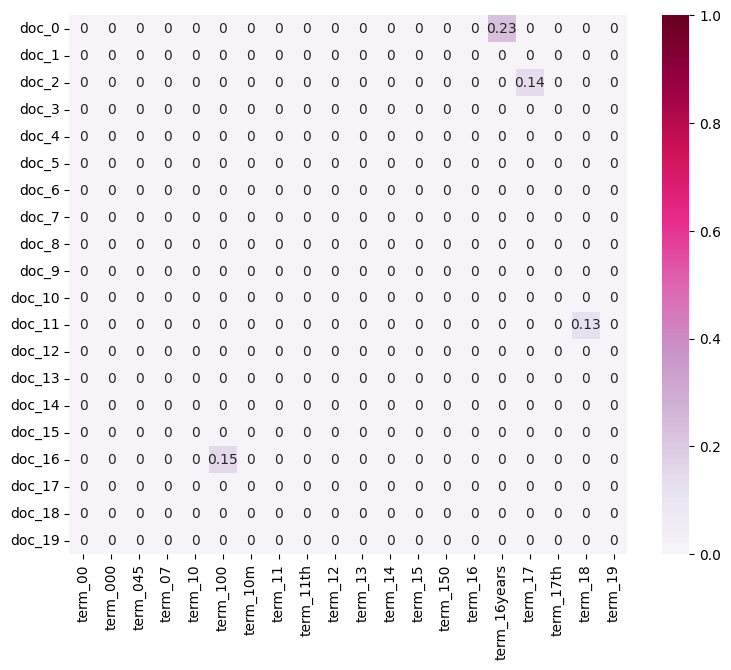

In [142]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

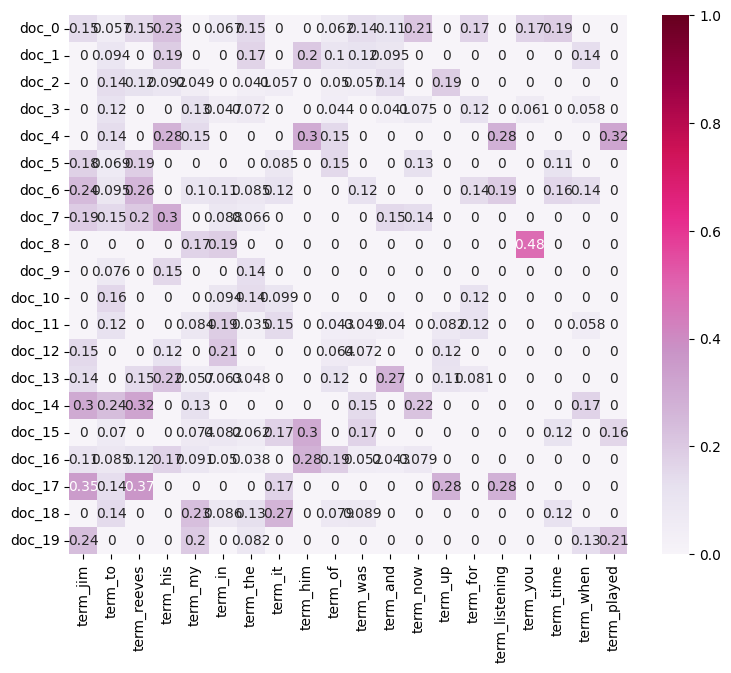

In [143]:
# Answer here
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()] # get the entire features
plot_y = ["doc_"+ str(i) for i in list(X.index)] # get the entire documents
plot_z = X_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

filtered_df_first20 = df_todraw.iloc[:20, :] # get only the first 20 documents
filtered_terms = filtered_df_first20.loc[:, (filtered_df_first20 > 0).any(axis=0)] #filter any feature that doesnt have a value (>0)
top_20_terms = filtered_terms.loc[:, filtered_terms.sum(axis=0).sort_values(ascending=False).index[:20]] #sort the terms from biggest to smallest and then only get the top 20 biggest features
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(top_20_terms,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [144]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [145]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [146]:
term_frequencies[0] #sum of first term: 00

0.3418539944187727

C:\Users\Humam\AppData\Local\Temp\ipykernel_6632\3140323867.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '045'),
 Text(3, 0, '07'),
 Text(4, 0, '10'),
 Text(5, 0, '100'),
 Text(6, 0, '10m'),
 Text(7, 0, '11'),
 Text(8, 0, '11th'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '150'),
 Text(14, 0, '16'),
 Text(15, 0, '16years'),
 Text(16, 0, '17'),
 Text(17, 0, '17th'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '1927'),
 Text(21, 0, '1930'),
 Text(22, 0, '1930s'),
 Text(23, 0, '1950'),
 Text(24, 0, '1950s'),
 Text(25, 0, '1952'),
 Text(26, 0, '1954'),
 Text(27, 0, '1955'),
 Text(28, 0, '1956'),
 Text(29, 0, '1957'),
 Text(30, 0, '1958'),
 Text(31, 0, '1960'),
 Text(32, 0, '1960s'),
 Text(33, 0, '1962'),
 Text(34, 0, '1963'),
 Text(35, 0, '1964'),
 Text(36, 0, '1965'),
 Text(37, 0, '1966'),
 Text(38, 0, '1967'),
 Text(39, 0, '1968'),
 Text(40, 0, '1969'),
 Text(41, 0, '1970'),
 Text(42, 0, '1970s'),
 Text(43, 0, '1973'),
 Text(44, 0, '1974'),
 Text(45, 0, '1975'),
 Text(46, 0, '1976')

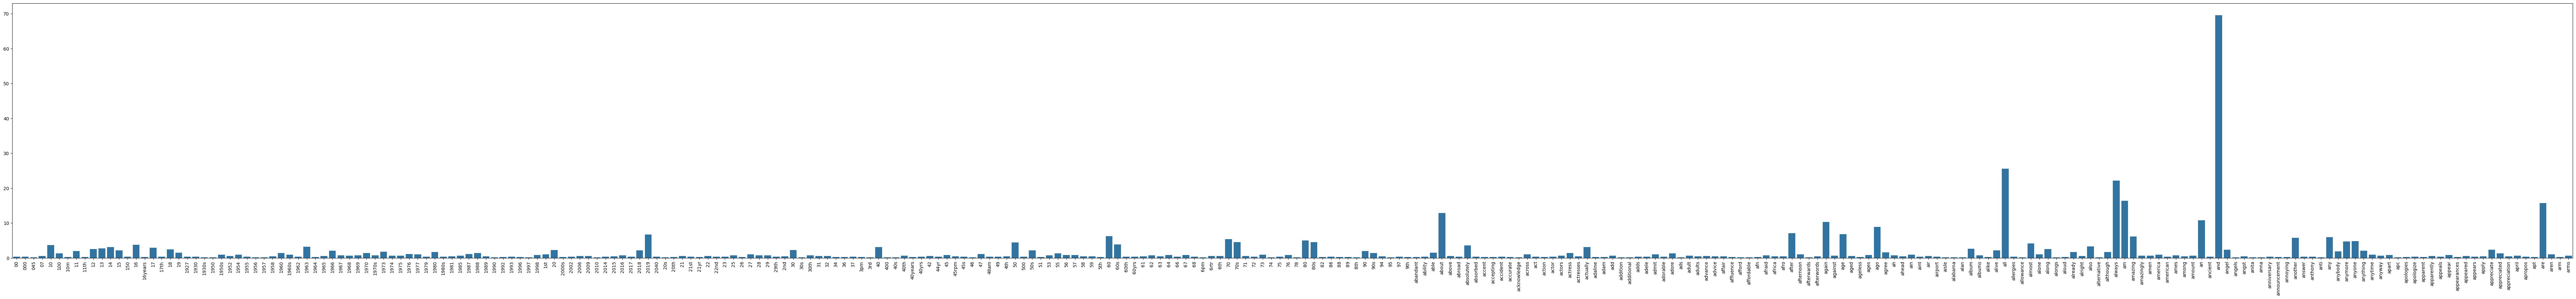

In [147]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [148]:
# Answer here
import plotly.express as px

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()


In [149]:
term_values_log = [math.log(i) for i in term_frequencies]

In [150]:
# Answer here

# Create a DataFrame for plotly
data = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(), #all the features
    'Frequency': term_frequencies_log # all the frequency
})

top_n = 50  # i want to know only the top 50 frequencies
data = data.sort_values(by='Frequency', ascending=False).head(top_n) # sort from biggest to smallest

# Create the bar plot using plotly
fig = px.bar(data, x='Term', y='Frequency')

# Show the plot
fig.show()

#Differences:
# The log data has way less frequency difference than the original data
# The log data can eliminate unnecessary outliers that can dominate the dataset like the word '01'
# We can see the log data easier because the difference between each frequencies is less than 10

#Insights:
# some word frequencies are very common while some are very rare, so a log transform can make us see this distribution by highlighting the long tail
# We can use the data of the uncommon words better because its influence is bigger in the term_frequencies_log 

In [151]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment_name'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment_name'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_tfidf(df):
    count_vect = TfidfVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_tfidf(sentiment_dfs[sentiment])


In [152]:
# Display the filtered DataFrame for one of the sentiments, feel free to change the number in the vector
sentiment_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045   10  100  10m   11   12   14   15  ...  youngest  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   

     youngsters      your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0           0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
1           0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
2           0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
3           0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
4           0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
..          ...       ...       ...    ...      ...  ...  ...      ...    ...  
743         0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
744         0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
745         0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
746         0.0  0.244424       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
747         0.0  0.000000       0.0    0.0      0.0  0.0  0.0      0.0    0.0  

[748 rows x 2602 columns]

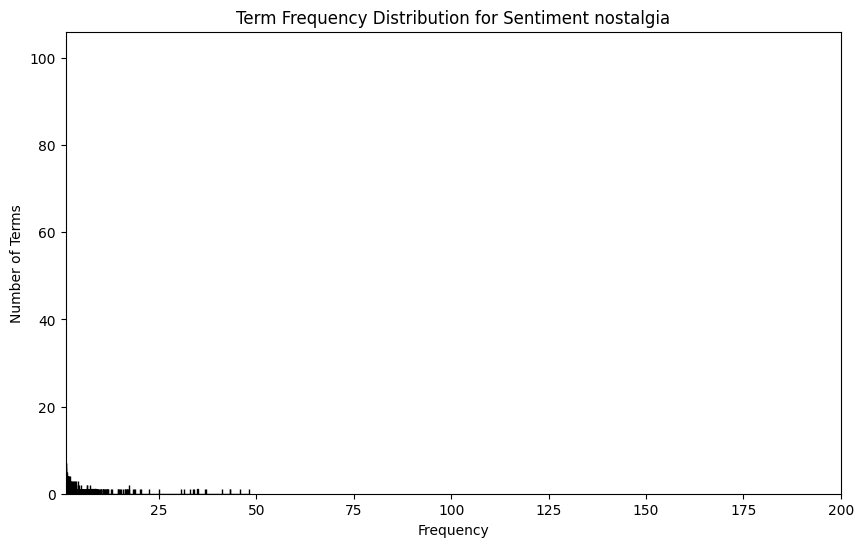

In [153]:
 # Sum over all documents to get total frequency for each word
sentiment_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [154]:
sentiment_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['copy', 'pretty', 'posted', 'crossed', 'perfect', 'peace', 'death', 'cockamame', 'graffiti', 'got', '2018', 'ames', 'bournemout', 'impeccable', 'interpretation', 'harmony', 'eternal', 'japanese', 'attack', 'could', 'emerge', '74', 'couples', 'deeply', '1st', 'field', 'bus', 'dancers', 'darling', 'comma', 'instructions', 'damn', 'assured', 'piece', 'leoni', 'lift', 'anymore', 'any', 'lorry', 'planet', 'pay', 'covered', 'oh', 'mobile', 'mid', 'ending', 'matter', 'lovey', 'america', 'healthy', 'hurry', 'bkk', 'fill', '62', 'graphics', '40th', 'lets', 'non', 'painter', 'nicknamed', 'artistically', 'greats', 'baby', 'alan', '89', 'create', 'blast', 'belongs', 'find', 'discover', 'jamie', 'holgmany', '1990', 'emotion', 'barbados', '20s', '2000s', 'index', 'location', 'breakfast', 'kill', 'lou', 'listen', 'lisa', 'decent', 'english', 'cargo', 'backwards', 'cornell', 'corn', 'current', 'chen', 'knows', 'lovers', 'gone', '

In [155]:
sentiment_number=1 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"Sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Sentiment: nostalgia
Number of terms in bottom 1%: 22
Filtered terms: ['dum', 'maine', 'adam', 'concerning', 'converts', 'character', 'evokes', 'illicit', 'cooler', 'elvis', 'canadian', '6rtr', 'drifted', 'daddy', 'felt', 'devistating', 'fresh', 'addition', 'additional', '20s', 'morning', 'deserve']


In [156]:
sentiment_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]


Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045   10  100  10m   11   12   14   15  ...  younger  youngest  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...       ...   
743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
1           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
2           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
3           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
4           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
743         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
744         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
745         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
746         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
747         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  

[748 rows x 2446 columns]

In [157]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>', 0) #change it to 0 because the range is from 0 to 1


Database size (total no of transactions) : 743
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.456258411843876
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 6.033590182951394
Variance in Transaction Sizes : 36.453272774103674
Sparsity : 0.9965428215814212


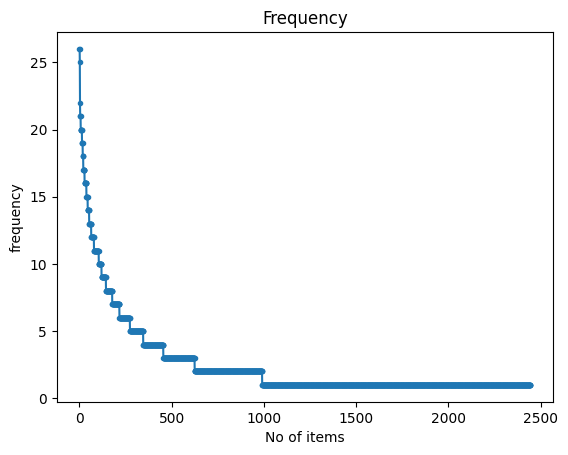

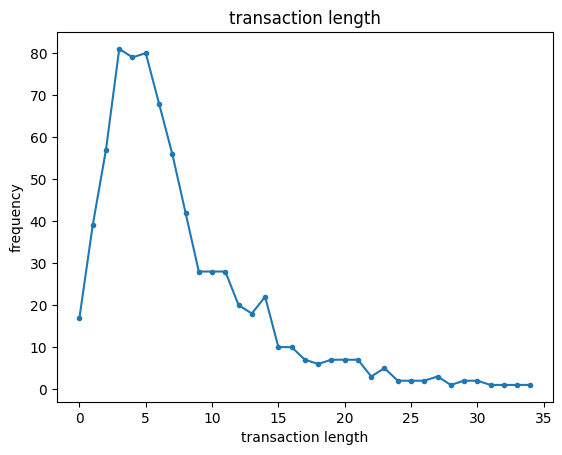

In [158]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 728
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.81456043956044
Maximum Transaction Size : 40
Standard Deviation Transaction Size : 7.440419540500035
Variance in Transaction Sizes : 55.435991278322774
Sparsity : 0.9959172948404074


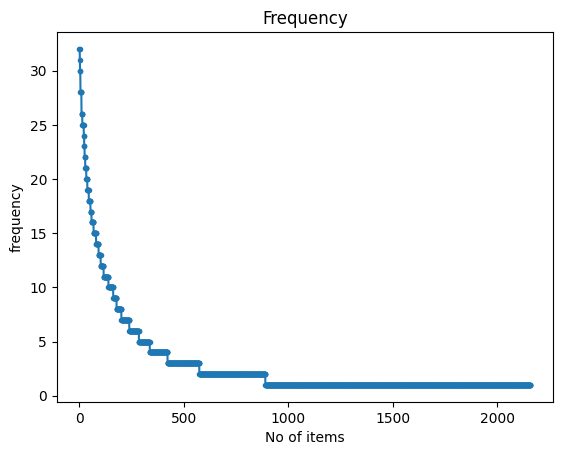

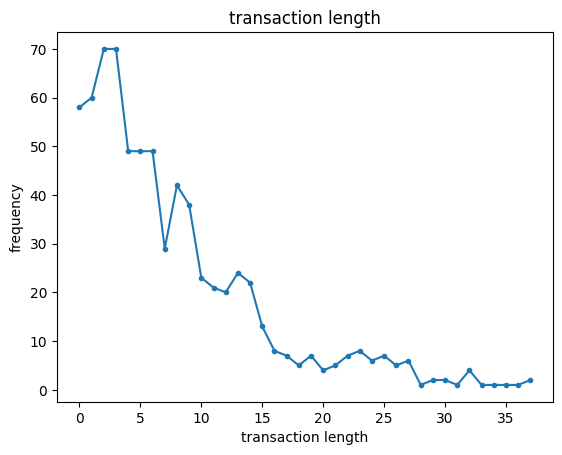

In [159]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [160]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.010919332504272461


In [161]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0       find        9
1       down        9
2        few        9
3        its        9
4       sure        9
..       ...      ...
175   passed       30
176    after       30
177      our       31
178      who       32
179    there       32

[180 rows x 2 columns]

In [162]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.005998849868774414


In [163]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139       them       21
140      their       22
141         or       25
142       come       26
143        way       26

[144 rows x 2 columns]

In [164]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all sentiments
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
211      there       32
210        who       32
209     passed       30
208       will       28
207      would       28
..         ...      ...
1      special        9
92       along        9
91    together        9
90        left        9
0    favorites        9

[212 rows x 2 columns]
Number of patterns discarded: 112


In [165]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = TfidfVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045   07   10  100  10m   11  11th   12  ...  place  karen  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
0           0      0   0        0      0         0     0          0  
1           0      0   0        0      0         0     0          0  
2           0      0   0        0      0         0     0          0  
3           0      0   0        0      0         0     0          0  
4           0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1495        0      0   0        0      0         0     0          0  
1496        0      0   0        0      0         0     0          0  
1497        0      0   0        0      0         0     0          0  
1498        0      0   0        0      0         0     0          0  
1499        0      0   0        0      0         0     0          0  

[1498 rows x 3942 columns]

In [166]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [167]:
X_pca_tdm.shape

(1498, 2)

In [168]:
X_tsne_tdm.shape

(1498, 2)

In [169]:
X_umap_tdm.shape

(1498, 2)

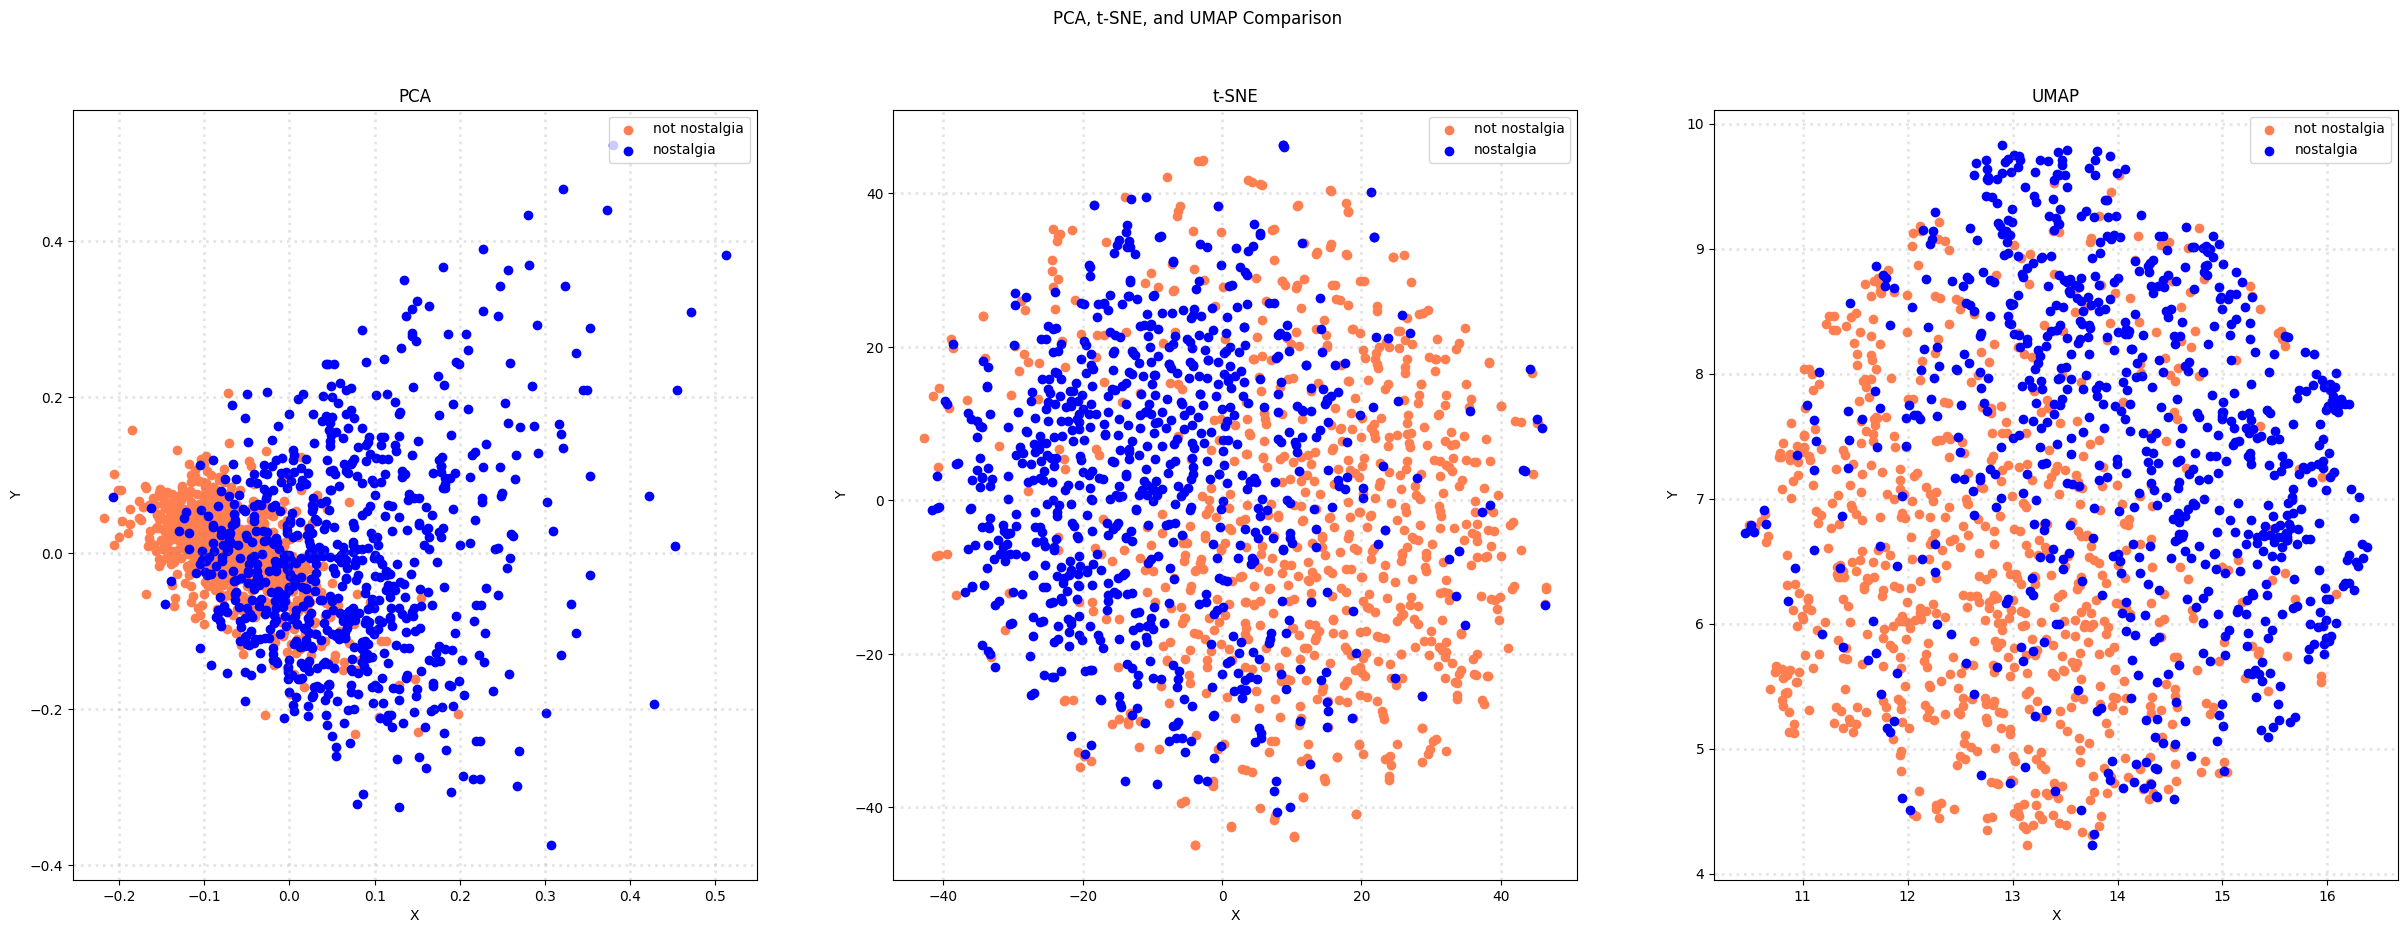

In [170]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [171]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

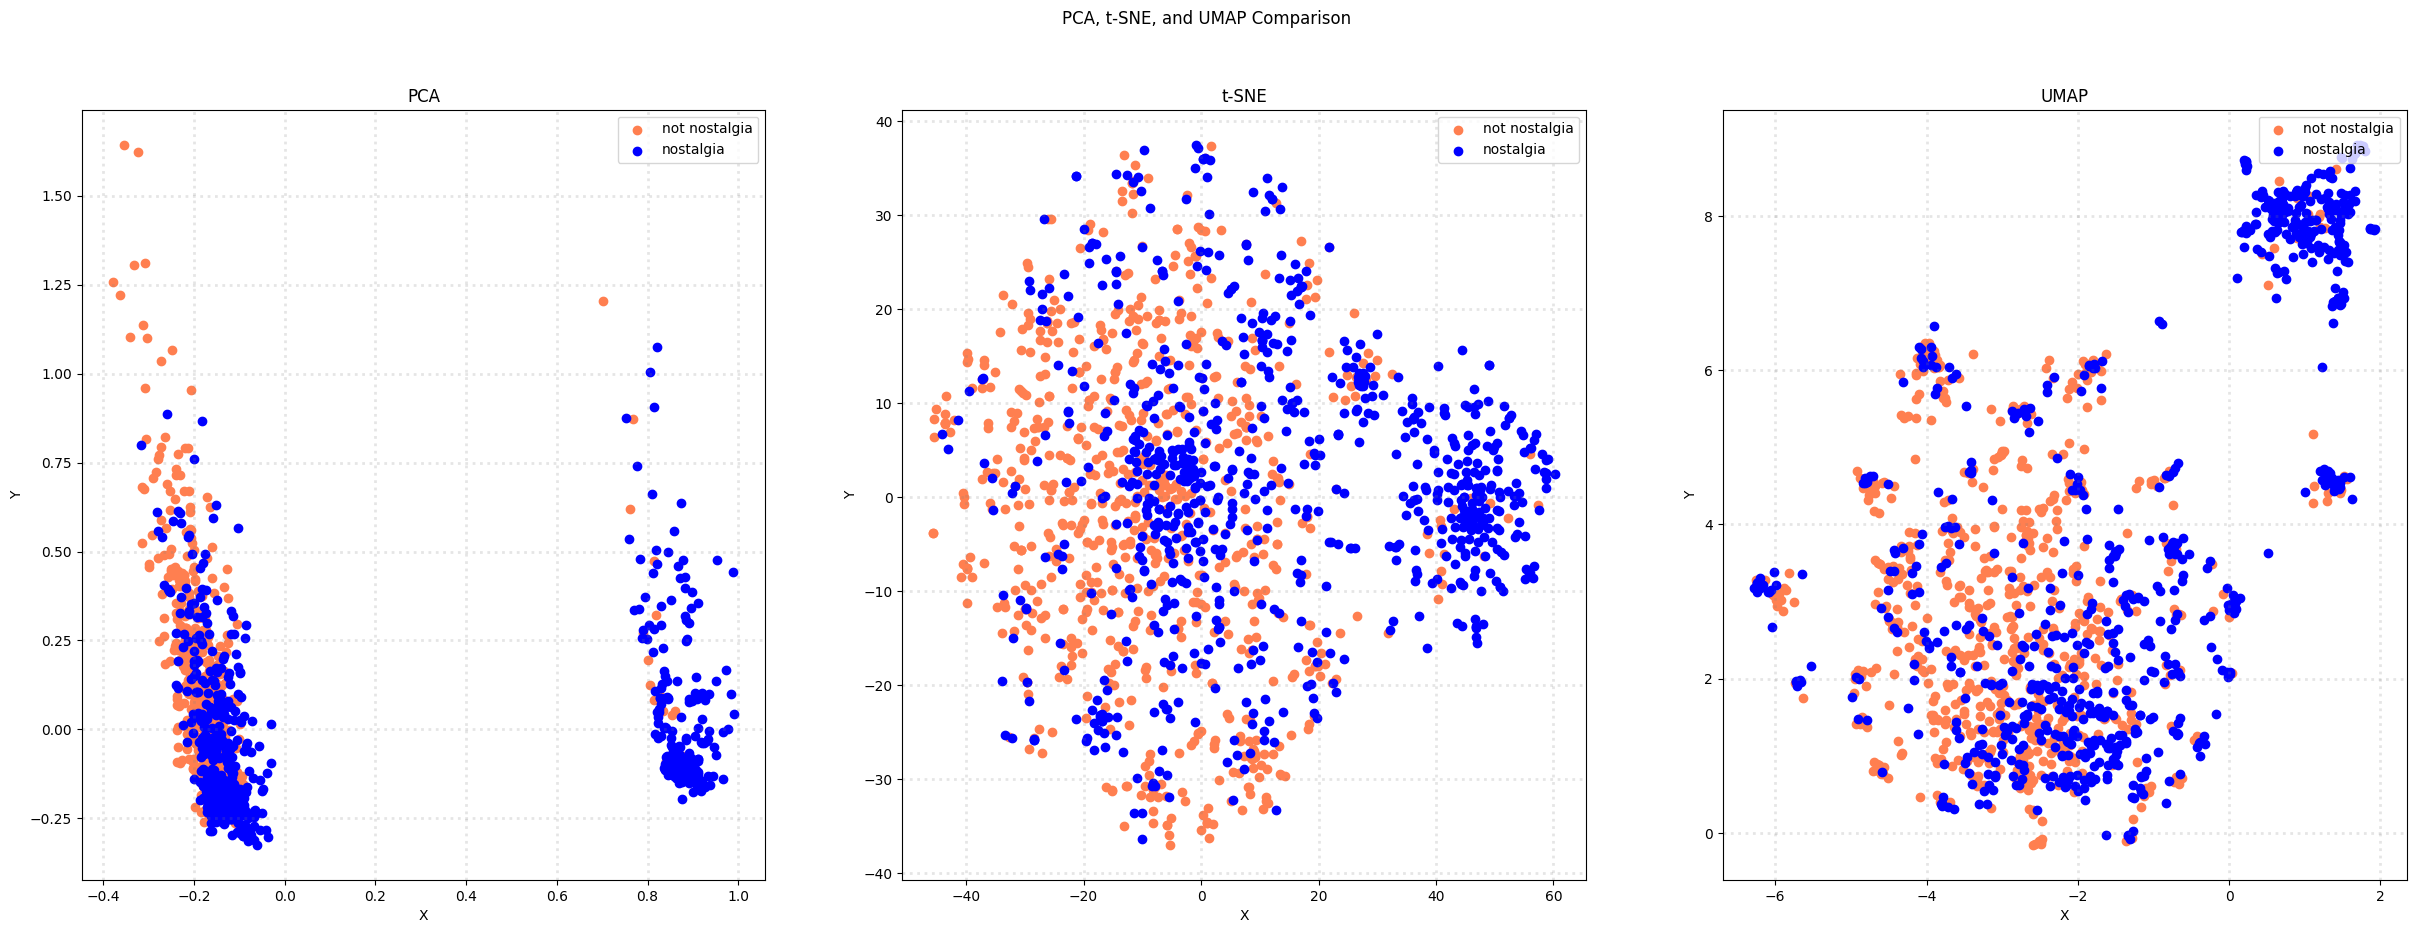

In [172]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

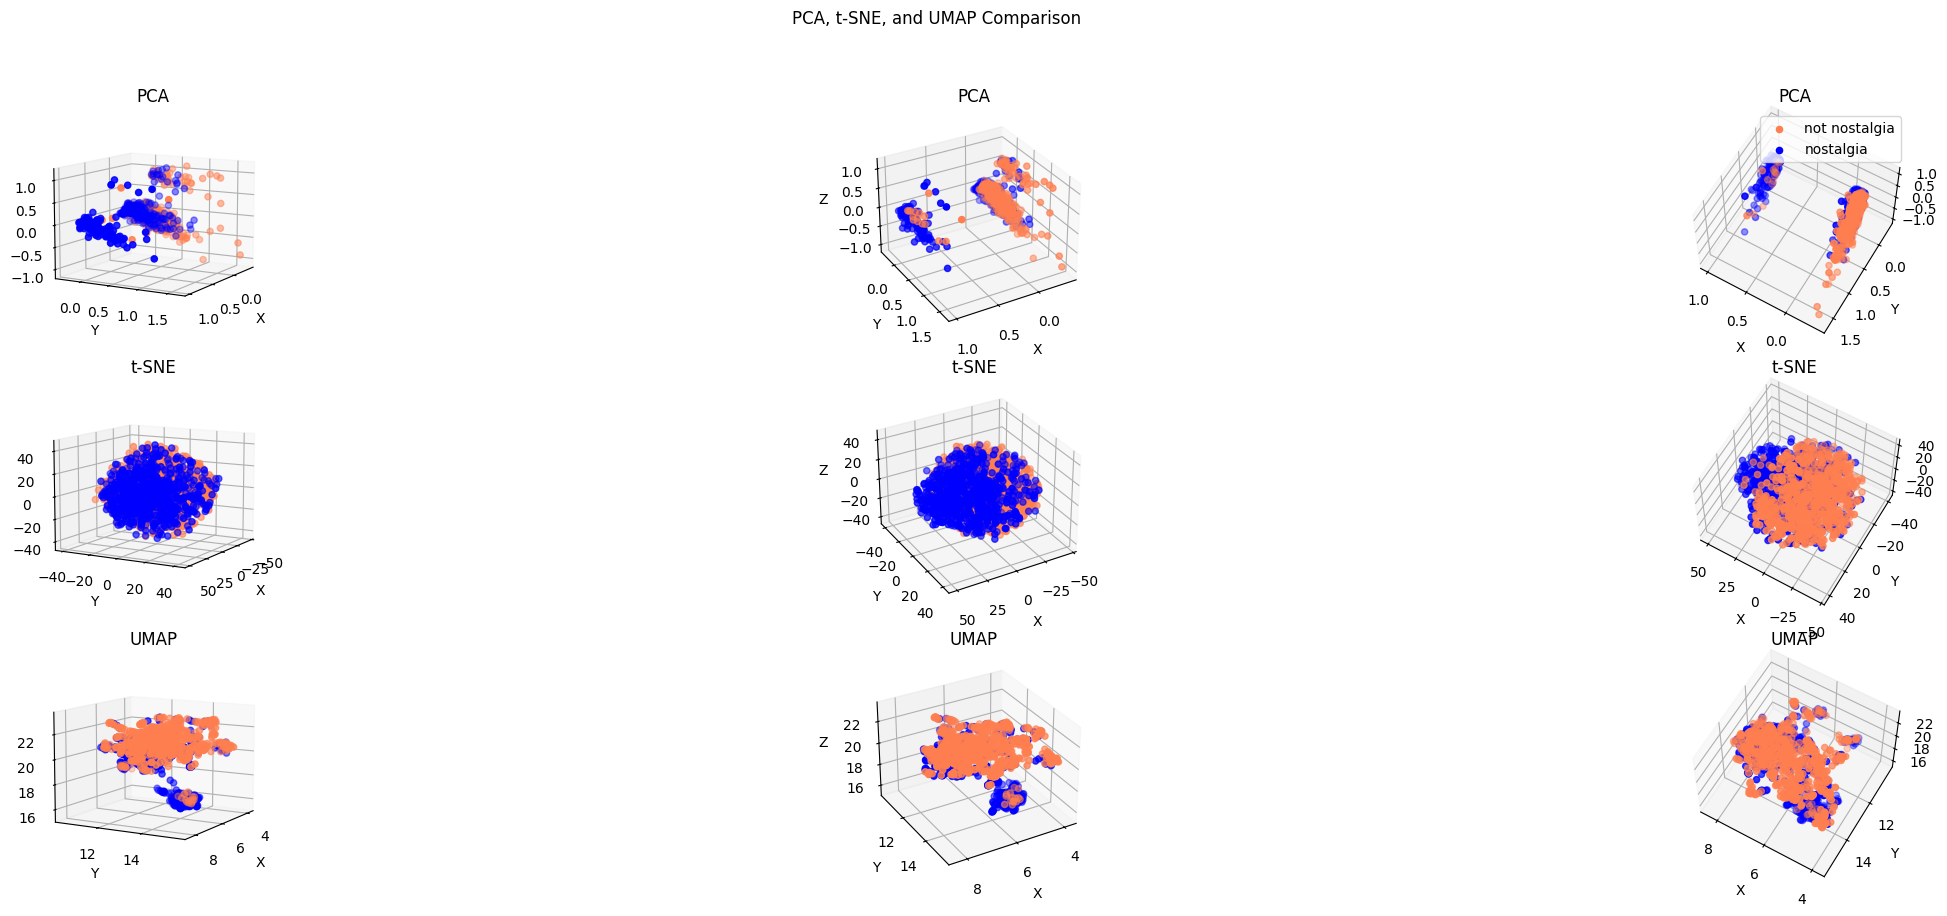

In [173]:
# Answer here

# Change the n_components to 3 for 3D plotting
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
sentiments = X['sentiment_name'].unique() 

fig, axes = plt.subplots(3, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title, elev, angle):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment_name'] == sentiment].T[0]
        ys = X_reduced[X['sentiment_name'] == sentiment].T[1]
        zs = X_reduced[X['sentiment_name'] == sentiment].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment)
        ax.view_init(elev = elev, azim=angle) #change camera position
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0, 0], X_pca_aug, 'PCA', 10, 30)
plot_scatter(axes[0, 1], X_pca_aug, 'PCA', 30, 60)
plot_scatter(axes[0, 2], X_pca_aug, 'PCA', 60, 120)
plot_scatter(axes[1, 0], X_tsne_aug, 't-SNE', 10, 30)
plot_scatter(axes[1, 1], X_tsne_aug, 't-SNE', 30, 60)
plot_scatter(axes[1, 2], X_tsne_aug, 't-SNE', 60, 120)
plot_scatter(axes[2, 0], X_umap_aug, 'UMAP', 10, 30)
plot_scatter(axes[2, 1], X_umap_aug, 'UMAP', 30, 60)
plot_scatter(axes[2, 2], X_umap_aug, 'UMAP', 60, 120)
axes[0, 2].legend(loc='upper right') #show the legend only on the top right data

plt.show()

**Naive Bayes Classifier**

Word Frequency

In [174]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment_name'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment_name'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])


In [175]:
sentiment_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]


Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
743    0    0   0    0    0   0   0   0   0    0  ...        0         0   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
743           0         0      0        0    0    0        0      0  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  

[748 rows x 2446 columns]

In [176]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)


Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


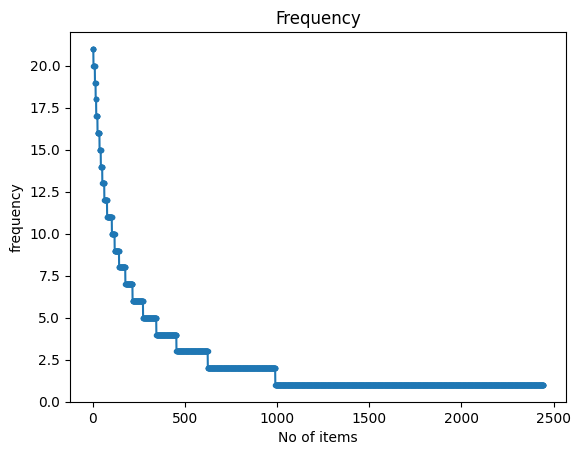

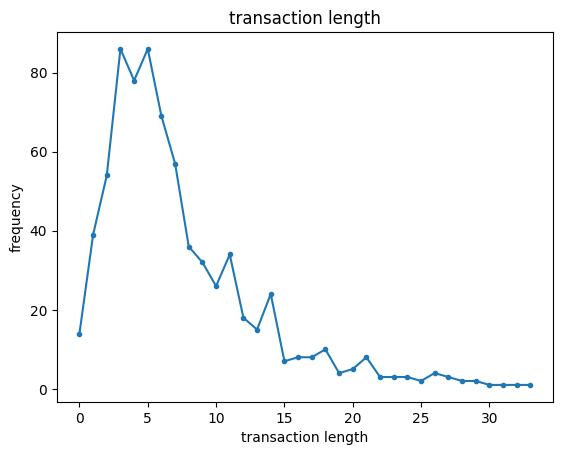

In [177]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [178]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.022462129592895508


In [179]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [180]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.005205392837524414


In [181]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.10372252435774
Sparsity : 0.9959733855996001


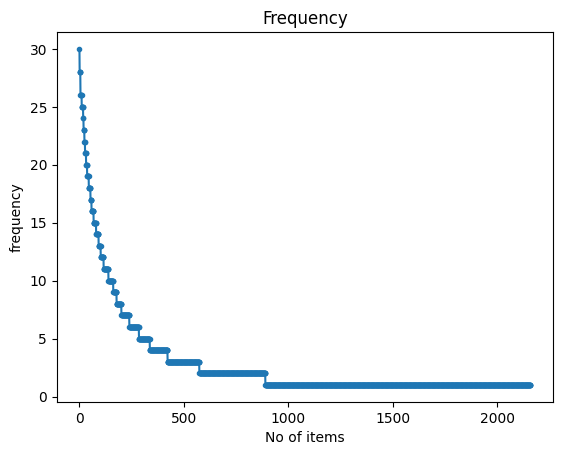

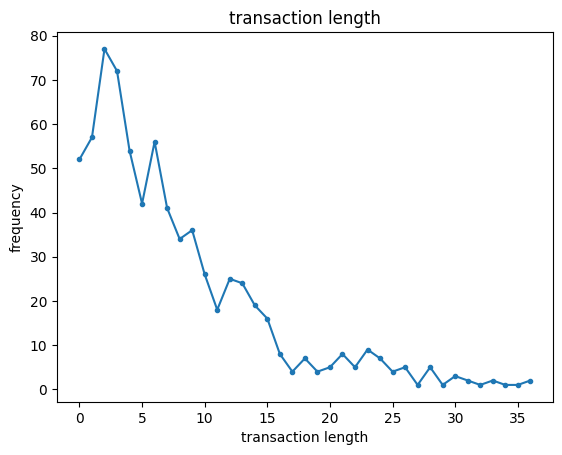

In [182]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [183]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all sentiments
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
219       will       28
218      would       28
217       ever       28
216       wish       26
215         or       26
..         ...      ...
1      special        9
96       along        9
95    together        9
94        left        9
0    favorites        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [184]:
#get tdm_df for word frequency features

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  place  karen  \
0      0    0    0   0   0    0    0   0     0   0  ...      0      0   
1      0    0    0   0   0    0    0   0     0   0  ...      0      0   
2      0    0    0   0   0    0    0   0     0   0  ...      0      0   
3      0    0    0   0   0    0    0   0     0   0  ...      0      0   
4      0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
0           0      0   0        0      0         0     0          0  
1           0      0   0        0      0         0     0          0  
2           0      0   0        0      0         0     0          0  
3           0      0   0        0      0         0     0          0  
4           0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1495        0      0   0        0      0         0     0          0  
1496        0      0   0        0      0         0     0          0  
1497        0      0   0        0      0         0     0          0  
1498        0      0   0        0      0         0     0          0  
1499        0      0   0        0      0         0     0          0  

[1498 rows x 3950 columns]

In [185]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)

In [186]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [187]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [188]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [189]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)

In [190]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  place  karen  \
890    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0      0   
709    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0      0   
940    0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0      0   
862    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
890         0      0   0        0      0         0     0          0  
1397        0      0   0        0      0         0     0          0  
709         0      0   0        0      0         0     0          0  
1273        0      0   0        0      0         0     0          0  
940         0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1132        0      0   0        0      0         0     0          0  
1296        0      0   0        0      0         0     0          0  
862         0      0   0        0      0         0     0          0  
1461        0      0   0        0      0         0     0          0  
1128        0      0   0        0      0         0     0          0  

[1048 rows x 3950 columns]

In [191]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  place  karen  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0      0   
790    0    0    0   0   0    0    0   0     0   0  ...      0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...    ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0      0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0      0   
484    0    0    0   0   0    0    0   0     0   0  ...      0      0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0      0   
201    0    0    0   0   0    0    0   0     0   0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
1035        0      0   0        0      0         0     0          0  
1307        0      0   0        0      0         0     0          0  
1437        0      0   0        0      0         0     0          0  
1491        0      0   0        0      0         0     0          0  
790         0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1231        0      0   0        0      0         0     0          0  
1275        0      0   0        0      0         0     0          0  
484         0      0   0        0      0         0     0          0  
1329        0      0   0        0      0         0     0          0  
201         0      0   0        0      0         0     0          0  

[450 rows x 3950 columns]

In [192]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8777777777777778

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9289    0.8305    0.8770       236
    nostalgia     0.8326    0.9299    0.8786       214

     accuracy                         0.8778       450
    macro avg     0.8808    0.8802    0.8778       450
 weighted avg     0.8831    0.8778    0.8777       450



TF_IDF

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	0.10512242613948135
  (0, 3570)	0.1395362132685669
  (0, 2973)	0.13337598417101282
  (0, 3650)	0.09116875732490397
  (0, 1470)	0.17742899300775078
  (0, 3534)	0.10583883750913557
  (0, 3282)	0.08098852685035728
  (0, 2028)	0.08425574837468117
  (0, 3336)	0.056549174016642896
  (0, 1606)	0.1189173359366918
  (0, 233)	0.1978969806456795
  (0, 3284)	0.15159319854457548
  (0, 3328)	0.18796232534895616
  (0, 1651)	0.22760529302349403
  (0, 1512)	0.09514910066637612
  (0, 1249)	0.1985326064308052
  (0, 323)	0.10632598515668054
  (0, 214)	0.14662971231064667
  (0, 2341)	0.061587482183078086
  (0, 15)	0.2319810423360621
  (0, 1733)	0.06687972443553816
  (0, 3304)	0.12461719323016085
  (0, 907)	0.1131812764053898
  (0, 258)	0.11455169045496554
  (0, 3124)	0.11081534257382304
  (0, 2328)	0.21167767501827114
  (0, 245)	0.18618778394860272
  (0, 3581)	0.10783601751651177
  (0, 1591)	0.09689935714518438
  (0, 2082)	0.11380264651174701
  (0, 2974)	0.15632537958469636
  (0, 573)	0.0949794

In [194]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Create separate DataFrames for each sentiment
sentiments = X['sentiment_name'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment_name'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_tfidf(df):
    count_vect = TfidfVectorizer()  # Initialize the TfidfVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    term_document_dfs[sentiment] = create_term_document_tfidf(sentiment_dfs[sentiment])


In [195]:
sentiment_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each sentiment
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the sentiments
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]


Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045   10  100  10m   11   12   14   15  ...  younger  youngest  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...      ...       ...   
743  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
744  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
745  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
746  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   
747  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0       0.0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
1           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
2           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
3           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
4           0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
743         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
744         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
745         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
746         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  
747         0.0       0.0    0.0      0.0  0.0  0.0      0.0    0.0  

[748 rows x 2446 columns]

In [196]:
#from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.convert.DF2DB import DF2DB
# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    #obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj = DF2DB(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>', 0)


Database size (total no of transactions) : 743
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.456258411843876
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 6.033590182951394
Variance in Transaction Sizes : 36.453272774103674
Sparsity : 0.9965428215814212


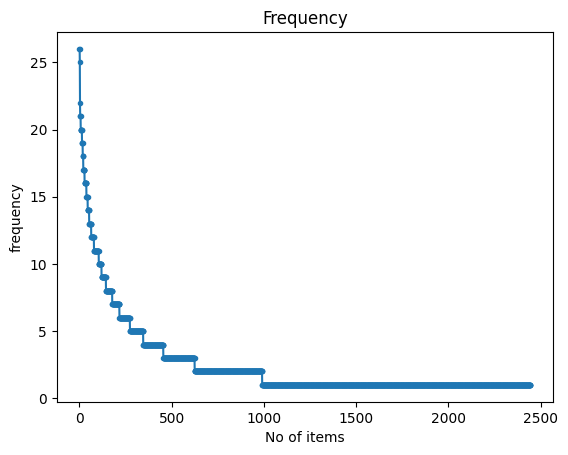

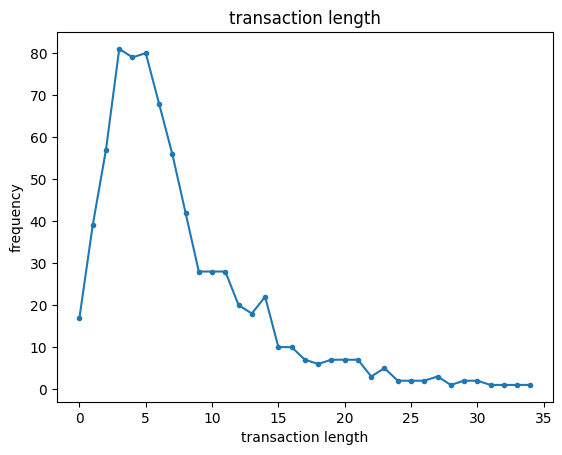

In [197]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 728
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.81456043956044
Maximum Transaction Size : 40
Standard Deviation Transaction Size : 7.440419540500035
Variance in Transaction Sizes : 55.435991278322774
Sparsity : 0.9959172948404074


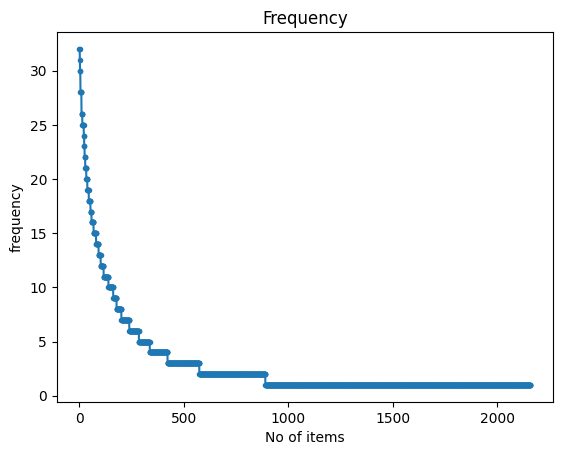

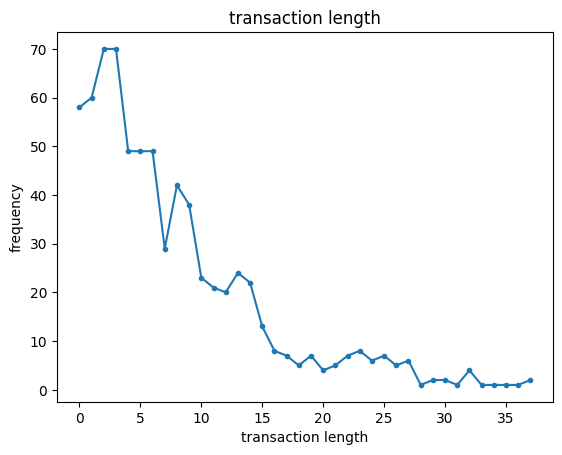

In [198]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [199]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.005316495895385742


In [200]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0       find        9
1       down        9
2        few        9
3        its        9
4       sure        9
..       ...      ...
175   passed       30
176    after       30
177      our       31
178      who       32
179    there       32

[180 rows x 2 columns]

In [201]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.004152774810791016


In [202]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139       them       21
140      their       22
141         or       25
142       come       26
143        way       26

[144 rows x 2 columns]

In [203]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all sentiments
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
211      there       32
210        who       32
209     passed       30
208       will       28
207      would       28
..         ...      ...
1      special        9
92       along        9
91    together        9
90        left        9
0    favorites        9

[212 rows x 2 columns]
Number of patterns discarded: 112


In [204]:
#get tdm_tfidf for TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'comment' column into term-document matrix using TfidfVectorizer
count_vect = TfidfVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_tfidf = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_tfidf = pd.concat([tdm_tfidf, pattern_matrix], axis=1)

augmented_tfidf

00  000  045   07   10  100  10m   11  11th   12  ...  place  karen  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1498  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1499  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
0           0      0   0        0      0         0     0          0  
1           0      0   0        0      0         0     0          0  
2           0      0   0        0      0         0     0          0  
3           0      0   0        0      0         0     0          0  
4           0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1495        0      0   0        0      0         0     0          0  
1496        0      0   0        0      0         0     0          0  
1497        0      0   0        0      0         0     0          0  
1498        0      0   0        0      0         0     0          0  
1499        0      0   0        0      0         0     0          0  

[1498 rows x 3942 columns]

In [205]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_tfidf, X['sentiment'], test_size=0.3, random_state=42)

In [206]:
X_train

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
890   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1397  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
709   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1273  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
940   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
862   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1461  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1397    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
709     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1273    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
940     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1296    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
862     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1461    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1128    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1048 rows x 3730 columns]

In [207]:
X_test

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
1035  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1307  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1437  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1491  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
790   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1231  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1275  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
484   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1329  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

         youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035  0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1307  0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1437  0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1491  0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
790   0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...        ...       ...      ...  ...  ...  ...      ...    ...  
1231  0.313775       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1275  0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
484   0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1329  0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
201   0.000000       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[450 rows x 3730 columns]

In [208]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.9022222222222223

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9364    0.8729    0.9035       236
    nostalgia     0.8696    0.9346    0.9009       214

     accuracy                         0.9022       450
    macro avg     0.9030    0.9037    0.9022       450
 weighted avg     0.9046    0.9022    0.9023       450



In [209]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to sentiment names
sentiment_mapping = dict(X[['sentiment', 'sentiment_name']].drop_duplicates().values)

# Convert the numerical sentiment labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_tfidf, X['sentiment'], test_size=0.3, random_state=42)

In [210]:
X_train

00  000  045   07   10  100  10m   11  11th   12  ...  place  karen  \
890   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1397  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
709   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1273  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
940   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
1132  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
862   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1461  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1128  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
890         0      0   0        0      0         0     0          0  
1397        0      0   0        0      0         0     0          0  
709         0      0   0        0      0         0     0          0  
1273        0      0   0        0      0         0     0          0  
940         0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1132        0      0   0        0      0         0     0          0  
1296        0      0   0        0      0         0     0          0  
862         0      0   0        0      0         0     0          0  
1461        0      0   0        0      0         0     0          0  
1128        0      0   0        0      0         0     0          0  

[1048 rows x 3942 columns]

In [211]:
X_test

00  000  045   07   10  100  10m   11  11th   12  ...  place  karen  \
1035  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1307  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1437  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1491  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
790   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
1231  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1275  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
484   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
1329  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   
201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...      0      0   

      records  until  tv  special  along  together  left  favorites  
1035        0      0   0        0      0         0     0          0  
1307        0      0   0        0      0         0     0          0  
1437        0      0   0        0      0         0     0          0  
1491        0      0   0        0      0         0     0          0  
790         0      0   0        0      0         0     0          0  
...       ...    ...  ..      ...    ...       ...   ...        ...  
1231        0      0   0        0      0         0     0          0  
1275        0      0   0        0      0         0     0          0  
484         0      0   0        0      0         0     0          0  
1329        0      0   0        0      0         0     0          0  
201         0      0   0        0      0         0     0          0  

[450 rows x 3942 columns]

In [212]:
# Train the Naive Bayes classifier
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8977777777777778

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9241    0.8771    0.9000       236
    nostalgia     0.8717    0.9206    0.8955       214

     accuracy                         0.8978       450
    macro avg     0.8979    0.8988    0.8977       450
 weighted avg     0.8992    0.8978    0.8978       450



In [213]:
#For the TF-IDF I used Bernoulli instead of Multinomial
#Differences:
# Multinomial bayes treats the features as frequency counts while Bernoulli treats features as binary indicator (either 0 or 1)
# Multinomial considers the word frequency, so if the document has higher word counts, it will also have higher feature value
# Bernoulli only considers if the words exist or not, so the document length has less impact on the value
# For multinomial, if a certain word has a very high frequency, then it will impact the prediction
# For Bernoulli, the presence of certain words can be enough to make prediction without needing to know the frequency

## 4. What can be improved

From the lab, there are several things that can be improved to make the code more efficient and more meaningful:

1. In the lab, there are multiple definitions of the same import function. To make it more efficient, all imports should be placed in the same place at the top of the code

2. In the lab, There are some functions that is wrapped inside another texts, for example like create_term_document_df(df), this makes it very hard to find and we might overlook it. if we want to make a function, it should be in a separate cell so we can easily find it.

3. For the augmented_df, we are only using unique features from all the files. But during my testing with the new dataset, this only creates more noises in the data that resulted in lower performance. To reduce noises, a better preprocessing method is needed, like a better feature selection and class balancing.